<a href="https://colab.research.google.com/github/sebaslop-afk/4GeeksAcademy/blob/master/Modelo_Predictivo_Con_base_a_fecha_10_06_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance ta pandas
!pip install pandas_datareader

In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import yfinance as yf
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import ta

# Paso 1: Obtener tickers del Dow Jones
def get_dow_tickers():
    url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
    tables = pd.read_html(url)
    for table in tables:
        if 'Symbol' in table.columns:
            return [t.replace('.', '-') for t in table['Symbol']]
    raise ValueError("No se encontró la columna 'Symbol'.")

# Obtener tickers
dow_tickers = get_dow_tickers()
extra_tickers = ['GC=F', 'EURUSD=X', 'GBPUSD=X', 'JPY=X', '^VIX', 'CL=F', '^TNX', '^SPX', 'DX-Y.NYB', 'UUP', 'XLV', 'XLF','^DJI']
all_tickers = dow_tickers + extra_tickers

print(f"✅ Tickers obtenidos ({len(all_tickers)}): {all_tickers}")

# ✅ Crear carpeta para los CSVs con ruta absoluta
# Asegúrate de que esta ruta coincide con tu entorno (puedes usar print(os.getcwd()) si dudas)
folder_path = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data"
os.makedirs(folder_path, exist_ok=True)

# Paso 2: Descargar datos
start_date = "2015-01-02"
end_date = "2025-05-10"

for ticker in all_tickers:
    try:
        print(f"📥 Descargando datos para: {ticker}")
        data = yf.download(ticker, start=start_date, end=end_date)

        if data.empty:
            print(f"⚠️ Sin datos para {ticker}, se omite.")
            continue

        data.reset_index(inplace=True)
        file_path = os.path.join(folder_path, f"{ticker}.csv")
        data.to_csv(file_path, index=False)
        print(f"✅ Guardado: {file_path} | Última fecha: {data['Date'].iloc[-1].date()}")

        time.sleep(1)  # para evitar bloqueos

    except Exception as e:
        print(f"❌ Error al procesar {ticker}: {e}")

# Paso 3: Leer archivos CSV y formatear
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
dfs = []

for file in csv_files:
    try:
        ticker = os.path.basename(file).replace(".csv", "")
        df = pd.read_csv(file)

        if "Date" not in df.columns or "Open" not in df.columns:
            print(f"⚠️ Formato inválido en: {file}, se omite.")
            continue

        df["Date"] = pd.to_datetime(df["Date"])
        df["Ticker"] = ticker

        df = df[["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]].copy()

        currency_tickers = ['GC=F']

        if ticker in currency_tickers:
            df["Volume"] = 0
        else:
            df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce").fillna(0).astype(int)

        dfs.append(df)

    except Exception as e:
        print(f"❌ Error procesando {file}: {e}")
        continue

# Paso 4: Concatenar todo
final_df = pd.concat(dfs).sort_values(["Date", "Ticker"]).reset_index(drop=True)

# Guardar dataset final en ruta absoluta también
output_path = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y.csv"
final_df.to_csv(output_path, index=False)
print("✅ Proceso completado. Registros combinados:", len(final_df))

# Ordenar por fecha (opcional)
final_df = final_df.sort_values("Date")

# Mostrar resultados
print(final_df.head(50))
print(final_df.shape)
print(final_df.tail(50))
print("📊 Total de tickers únicos:", len(final_df['Ticker'].unique()))


✅ Tickers obtenidos (43): ['MMM', 'AXP', 'AMGN', 'AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'NVDA', 'PG', 'CRM', 'SHW', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'GC=F', 'EURUSD=X', 'GBPUSD=X', 'JPY=X', '^VIX', 'CL=F', '^TNX', '^SPX', 'DX-Y.NYB', 'UUP', 'XLV', 'XLF', '^DJI']
📥 Descargando datos para: MMM


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/MMM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AXP


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/AXP.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AMGN


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/AMGN.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: AMZN


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/AMZN.csv | Última fecha: 2025-05-09
📥 Descargando datos para: AAPL


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/AAPL.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: BA


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/BA.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CAT


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/CAT.csv | Última fecha: 2025-05-09
📥 Descargando datos para: CVX


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/CVX.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: CSCO
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/CSCO.csv | Última fecha: 2025-05-09


📥 Descargando datos para: KO


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/KO.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: DIS


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/DIS.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: GS


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/GS.csv | Última fecha: 2025-05-09
📥 Descargando datos para: HD


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/HD.csv | Última fecha: 2025-05-09
📥 Descargando datos para: HON


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/HON.csv | Última fecha: 2025-05-09
📥 Descargando datos para: IBM


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/IBM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: JNJ


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/JNJ.csv | Última fecha: 2025-05-09
📥 Descargando datos para: JPM


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/JPM.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: MCD


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/MCD.csv | Última fecha: 2025-05-09
📥 Descargando datos para: MRK


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/MRK.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: MSFT


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/MSFT.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: NKE


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/NKE.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: NVDA


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/NVDA.csv | Última fecha: 2025-05-09
📥 Descargando datos para: PG


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/PG.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: CRM


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/CRM.csv | Última fecha: 2025-05-09
📥 Descargando datos para: SHW


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/SHW.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: TRV
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/TRV.csv | Última fecha: 2025-05-09


📥 Descargando datos para: UNH


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/UNH.csv | Última fecha: 2025-05-09
📥 Descargando datos para: VZ


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/VZ.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: V


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/V.csv | Última fecha: 2025-05-09
📥 Descargando datos para: WMT


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/WMT.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: GC=F
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/GC=F.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: EURUSD=X


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/EURUSD=X.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: GBPUSD=X
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/GBPUSD=X.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: JPY=X
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/JPY=X.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: ^VIX
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/^VIX.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: CL=F
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/CL=F.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: ^TNX
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/^TNX.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: ^SPX
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/^SPX.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: DX-Y.NYB
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/DX-Y.NYB.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: UUP
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/UUP.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: XLV
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/XLV.csv | Última fecha: 2025-05-09



/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: XLF


✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/XLF.csv | Última fecha: 2025-05-09


/tmp/ipykernel_2228/2861515197.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

📥 Descargando datos para: ^DJI
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/dow_data/^DJI.csv | Última fecha: 2025-05-09


✅ Proceso completado. Registros combinados: 112284
         Date    Ticker                 Open                 High  \
0  2015-01-02      AAPL   24.746229620306494    24.75733822078495   
24 2015-01-02       MMM     97.3516917085752    97.57037430653402   
25 2015-01-02       MRK    39.50769367737041   39.901253501871324   
26 2015-01-02      MSFT    39.91316387951886   40.563269701522984   
27 2015-01-02       NKE    42.53170597092245    42.70790920507789   
28 2015-01-02      NVDA  0.48306554555892944   0.4866651649418316   
29 2015-01-02        PG    67.73985926180471    67.85917482752035   
30 2015-01-02       SHW    79.20405197439949    80.03784077642115   
32 2015-01-02       UNH    86.19648128807316    87.14761720717019   
23 2015-01-02       MCD    72.16513892317755     72.8321300089375   
33 2015-01-02       UUP   20.838030087173994    20.90714454650879   
35 2015-01-02        VZ   27.490435759310795   27.624963155917577   
36 2015-01-02       WMT   23.421363990667754   23.54

In [ ]:
import os

# 🔹 Quitar filas con fechas nulas o mal formateadas
final_df = final_df[final_df["Date"].notna()].copy()

# 🔹 Obtener la ruta segura dentro del proyecto
ruta_guardado = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_limpios_hasta_2025-05-09.csv"

# 🔹 Guardar el dataset limpio
final_df.to_csv(ruta_guardado, index=False)
print(f"✅ Datos limpios guardados en: {ruta_guardado}")
print(f"📅 Última fecha registrada: {final_df['Date'].max().date()}")

# 🔹 Ver las últimas 42 filas como resumen
print(final_df.tail(42))


✅ Datos limpios guardados en: /workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_limpios_hasta_2025-05-09.csv
📅 Última fecha registrada: 2025-05-09
             Date    Ticker                Open                High  \
112222 2025-05-09       MMM  140.57151816322286  141.92489037003529   
112223 2025-05-09       MRK   77.18717452041082   77.67231499077468   
112224 2025-05-09      MSFT  439.19371771814804  439.93235195021686   
112225 2025-05-09       NKE  58.749570011217145   58.98798725094344   
112226 2025-05-09      NVDA  117.34184743589364   118.2217911942619   
112227 2025-05-09        PG  158.02000427246094   159.1300048828125   
112228 2025-05-09       SHW   351.7096128582116  353.00675933215217   
112238 2025-05-09      ^SPX    5679.64990234375    5691.68994140625   
112230 2025-05-09       UNH    382.951513682806   383.8252853099375   
112231 2025-05-09       UUP  27.649999618530273   27.68000030517578   
112232 2025-05-09         V  351.24663014231794   353.2133649760644   

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import os

# Tickers usados previamente (ajusta si alguno no es compatible con yfinance)
tickers = [
    "MMM", "MRK", "MSFT", "NKE", "NVDA", "PG", "SHW", "^SPX", "UNH", "UUP",
    "V", "VZ", "WMT", "XLF", "XLV", "^DJI", "KO", "TRV", "JPY=X", "DIS",
    "JNJ", "^TNX", "AAPL", "AMGN", "AMZN", "AXP", "BA", "CAT", "CL=F",
    "CRM", "CSCO", "CVX", "DX-Y.NYB", "EURUSD=X", "GBPUSD=X", "GC=F",
    "GS", "HD", "HON", "IBM", "JPM", "^VIX"
]

# Fechas de actualización
start_date = "2025-05-12"
end_date = "2025-06-13"

# Descargar nuevos datos
print(f"📥 Descargando datos desde {start_date} hasta {end_date}")
new_data = yf.download(tickers, start=start_date, end=end_date, group_by='date', auto_adjust=False)

# Transformar en formato largo
data_list = []
for ticker in tickers:
    if ticker in new_data.columns.levels[0]:
        df = new_data[ticker].copy()
        df['Ticker'] = ticker
        df['Date'] = df.index
        data_list.append(df.reset_index(drop=True))

new_df = pd.concat(data_list, ignore_index=True)

# Renombrar columnas para que coincidan con final_df
new_df = new_df.rename(columns={
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Volume': 'Volume'
})[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

# ✅ Ruta segura donde se guardó el dataset anterior
ruta_anterior = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_limpios_hasta_2025-05-09.csv"
ruta_actualizada = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_actualizados_hasta_2025-06-12.csv"

# Cargar datos anteriores
final_df = pd.read_csv(ruta_anterior)

# Asegurarse de que Date sea datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Concatenar y quitar duplicados
final_df = pd.concat([final_df, new_df], ignore_index=True)
final_df = final_df.drop_duplicates(subset=['Date', 'Ticker'])

# Guardar archivo actualizado
final_df.to_csv(ruta_actualizada, index=False)
print(f"✅ Datos actualizados guardados en: {ruta_actualizada}")
print(f"📅 Última fecha registrada: {final_df['Date'].max().date()}")

# Vista final
print(final_df.tail(42))


[**                     5%                       ]  2 of 42 completed

📥 Descargando datos desde 2025-05-12 hasta 2025-06-13


[*********************100%***********************]  42 of 42 completed


✅ Datos actualizados guardados en: /workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_actualizados_hasta_2025-06-12.csv
📅 Última fecha registrada: 2025-06-12
             Date Ticker        Open        High         Low       Close  \
113207 2025-05-20    JPM  262.519989  266.660004  262.299988  265.679993   
113208 2025-05-21    JPM  264.350006  265.649994  260.730011  261.040009   
113209 2025-05-22    JPM  259.440002  262.299988  258.869995  260.670013   
113210 2025-05-23    JPM  256.809998  261.989990  256.000000  260.709991   
113211 2025-05-26    JPM         NaN         NaN         NaN         NaN   
113212 2025-05-27    JPM  262.040009  265.299988  261.989990  265.290009   
113213 2025-05-28    JPM  266.239990  266.720001  262.899994  263.489990   
113214 2025-05-29    JPM  264.799988  265.410004  262.529999  264.369995   
113215 2025-05-30    JPM  263.450012  265.329987  262.730011  264.000000   
113216 2025-06-02    JPM  263.019989  265.029999  261.899994  264.660004   
11321

In [ ]:
# Ordenar por fecha
final_df = final_df.sort_values(by='Date').reset_index(drop=True)
print(final_df.tail(42))

             Date    Ticker          Open          High           Low  \
113207 2025-06-12       JPM    266.859985    268.290009    265.140015   
113208 2025-06-12       MMM    146.419998    147.270004    144.490005   
113209 2025-06-12       UUP     27.090000     27.139999     27.059999   
113210 2025-06-12       MRK     80.190002     82.110001     80.070000   
113211 2025-06-12      CL=F     69.029999     69.290001     66.720001   
113212 2025-06-12       CAT    359.850006    362.000000    357.869995   
113213 2025-06-12       WMT     94.889999     95.260002     93.430000   
113214 2025-06-12        BA    202.169998    206.339996    201.279999   
113215 2025-06-12       XLF     50.700001     51.009998     50.500000   
113216 2025-06-12       AXP    296.670013    298.579987    294.000000   
113217 2025-06-12       XLV    135.759995    136.839996    135.490005   
113218 2025-06-12        VZ     43.880001     43.889999     42.910000   
113219 2025-06-12      AMZN    211.779999    213.58

CODIGO PABLO MORENA VARIABLES

In [ ]:
final_df['Close'] = pd.to_numeric(final_df['Close'], errors='coerce')

In [ ]:
#Calcular las medias móviles exponenciales (EMA)
ema_12 = final_df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = final_df['Close'].ewm(span=26, adjust=False).mean()

print(ema_12)

0           24.288584
1           22.925109
2           31.685670
3           44.296676
4           48.216294
             ...     
113244    1405.657167
113245    1211.705295
113246    1043.536789
113247     883.201397
113248     750.096566
Name: Close, Length: 113249, dtype: float64


In [ ]:
def calcular_macd(grupo):
    close = grupo['Close']
    ema_12 = close.ewm(span=12, adjust=False).mean()
    ema_26 = close.ewm(span=26, adjust=False).mean()
    ema_50 = close.ewm(span=50, adjust=False).mean()
    ema_150 = close.ewm(span=150, adjust=False).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span=9, adjust=False).mean()
    grupo["MACD"] = macd
    grupo["MACD_Signal"] = signal
    grupo["MACD_Hist"] = macd - signal
    grupo["EMA_50"] = ema_50
    grupo["EMA_150"] = ema_150

    return grupo

# Aplicar por ticker
final_df = final_df.groupby("Ticker").apply(calcular_macd).reset_index(drop=True)

def interpretar_emas(ema_50, ema_150):
    if pd.isna(ema_50) or pd.isna(ema_150):
        return 'Sin datos'
    elif ema_50 > ema_150:
        return 'Tendencia Alcista'
    elif ema_50 < ema_150:
        return 'Tendencia Bajista'
    else:
        return 'Neutral'

final_df['EMA_Signal'] = final_df.apply(lambda row: interpretar_emas(row['EMA_50'], row['EMA_150']), axis=1)

/tmp/ipykernel_2228/2819583313.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df = final_df.groupby("Ticker").apply(calcular_macd).reset_index(drop=True)


In [ ]:
def calcular_rsi(df, period=14, column='Close'):
    delta = df[column].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    return df

#Aplicar por ticker
final_df = final_df.groupby("Ticker").apply(calcular_rsi).reset_index(drop=True)

def interpretar_rsi(rsi):
    if pd.isna(rsi):
        return 'Sin datos'
    elif rsi > 70:
        return 'Sobrecompra'
    elif rsi < 30:
        return 'Sobreventa'
    else:
        return 'Neutral'

final_df['RSI_Signal'] = final_df['RSI'].apply(interpretar_rsi)

/tmp/ipykernel_2228/2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipykernel_2228/2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipykernel_2228/2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipykernel_2228/2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg_gain / avg_loss.replace(to_replace=0, method='ffill')
/tmp/ipykernel_2228/2007162344.py:7: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  rs = avg

In [ ]:
print(final_df["RSI"].isna().sum()) #Existen 546 datos NaN porque el period es 14 y esta filtrado según los Tickers. Por lo que 13 valores vacíos por 42 tickers hacen 546 valores Nan

559


In [ ]:
# Eliminar columnas duplicadas generadas por nombres repetidos (como Close.1, High.1, etc.)
columnas_a_borrar = [col for col in final_df.columns if any(sufijo in col for sufijo in [".1", ".2", ".3"])]
final_df.drop(columns=columnas_a_borrar, inplace=True)
# Borrar columnas con sufijos numéricos no deseados (del tipo .4, .5, ..., .42)
columnas_a_borrar = [col for col in final_df.columns if any(col.endswith(f".{i}") for i in range(1, 43))]
final_df.drop(columns=columnas_a_borrar, inplace=True)

print(f"🧹 Columnas eliminadas: {columnas_a_borrar}")

print(f"🧹 Columnas eliminadas: {columnas_a_borrar}")

for i in final_df.columns:
  print(i)

🧹 Columnas eliminadas: []
🧹 Columnas eliminadas: []
Date
Ticker
Open
High
Low
Close
Volume
MACD
MACD_Signal
MACD_Hist
EMA_50
EMA_150
EMA_Signal
RSI
RSI_Signal


In [ ]:
print(type(final_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(final_df.head())

        Date Ticker       Open       High        Low      Close       Volume  \
0 2015-01-02   AAPL  24.746230  24.757338  23.848709  24.288584  212818400.0   
1 2015-01-05   AAPL  24.057535  24.137513  23.417720  23.604332  257142000.0   
2 2015-01-06   AAPL  23.668762  23.866483  23.244438  23.606558  263188400.0   
3 2015-01-07   AAPL  23.815377  24.037535  23.704298  23.937565  160423600.0   
4 2015-01-08   AAPL  24.266369  24.915071  24.148623  24.857309  237458000.0   

       MACD  MACD_Signal  MACD_Hist     EMA_50    EMA_150         EMA_Signal  \
0  0.000000     0.000000   0.000000  24.288584  24.288584            Neutral   
1 -0.054584    -0.010917  -0.043667  24.261750  24.279521  Tendencia Bajista   
2 -0.096550    -0.028043  -0.068507  24.236057  24.270607  Tendencia Bajista   
3 -0.101924    -0.042820  -0.059104  24.224351  24.266196  Tendencia Bajista   
4 -0.031603    -0.040576   0.008974  24.249173  24.274026  Tendencia Bajista   

   RSI RSI_Signal  
0  NaN  Sin datos 

In [ ]:
for i in final_df.columns:
  print(f"{i}: {final_df[i].isna().sum()}")

Date: 0
Ticker: 0
Open: 38
High: 38
Low: 38
Close: 38
Volume: 38
MACD: 0
MACD_Signal: 0
MACD_Hist: 0
EMA_50: 0
EMA_150: 0
EMA_Signal: 0
RSI: 559
RSI_Signal: 0


In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [ ]:
final_df = final_df.sort_values(by='Date').reset_index(drop=True)

In [ ]:
print(final_df.head())

        Date Ticker       Open       High        Low      Close       Volume  \
0 2015-01-02   AAPL  24.746230  24.757338  23.848709  24.288584  212818400.0   
1 2015-01-02    CVX  71.178256  72.051806  70.680908  71.784004    5898800.0   
2 2015-01-02    UUP  20.838030  20.907145  20.829391  20.907145    1887600.0   
3 2015-01-02   CSCO  20.236735  20.425592  19.888075  20.055141   22926500.0   
4 2015-01-02      V  61.189606  61.972538  60.982833  61.570614    8389600.0   

   MACD  MACD_Signal  MACD_Hist     EMA_50    EMA_150 EMA_Signal  RSI  \
0   0.0          0.0        0.0  24.288584  24.288584    Neutral  NaN   
1   0.0          0.0        0.0  71.784004  71.784004    Neutral  NaN   
2   0.0          0.0        0.0  20.907145  20.907145    Neutral  NaN   
3   0.0          0.0        0.0  20.055141  20.055141    Neutral  NaN   
4   0.0          0.0        0.0  61.570614  61.570614    Neutral  NaN   

  RSI_Signal  
0  Sin datos  
1  Sin datos  
2  Sin datos  
3  Sin datos  
4  Si

CODIGO PABLO RODADO ADX Y ATR

In [ ]:
import pandas as pd
import numpy as np
import ta
import os

# ✅ Ruta absoluta donde está tu archivo base limpio (ajústala si cambiaste el nombre)
ruta_entrada = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_actualizados_hasta_2025-06-12.csv"

# ✅ Ruta donde se guardará el nuevo archivo con ADX
ruta_salida = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y_ADX.csv"

# Cargar datos
final_df = pd.read_csv(ruta_entrada)

# Asegurar que Date sea tipo datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Lista para guardar dataframes por ticker con ADX
adx_list = []

for ticker in final_df['Ticker'].unique():
    df_ticker = final_df[final_df['Ticker'] == ticker].copy()
    df_ticker.sort_values("Date", inplace=True)

    # Asegurar que columnas clave sean numéricas
    for col in ['High', 'Low', 'Close']:
        df_ticker[col] = pd.to_numeric(df_ticker[col], errors='coerce')

    # Eliminar filas con datos faltantes
    df_ticker.dropna(subset=['High', 'Low', 'Close'], inplace=True)

    # Calcular ADX
    adx_indicator = ta.trend.ADXIndicator(
        high=df_ticker['High'],
        low=df_ticker['Low'],
        close=df_ticker['Close'],
        window=14,
        fillna=True
    )

    df_ticker['ADX'] = adx_indicator.adx()
    adx_list.append(df_ticker)

# Concatenar todos los tickers con su ADX
final_df = pd.concat(adx_list).sort_values(['Date', 'Ticker']).reset_index(drop=True)

# Clasificación de fuerza de la tendencia
def categorize_adx(adx_value):
    if adx_value < 20:
        return 'No Trend'
    elif adx_value < 30:
        return 'Weak Trend'
    else:
        return 'Strong Trend'

final_df['Trend_Strength'] = final_df['ADX'].apply(categorize_adx)

# Guardar en ruta segura
final_df.to_csv(ruta_salida, index=False)
print(f"✅ Columna ADX y clasificaciones añadidas. Guardado en: {ruta_salida}")
print(f"📅 Última fecha registrada: {final_df['Date'].max().date()}")
print("🔍 Últimas 50 filas del dataset:")
print(final_df.tail(50))


✅ Columna ADX y clasificaciones añadidas. Guardado en: /workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y_ADX.csv
📅 Última fecha registrada: 2025-06-12
🔍 Últimas 50 filas del dataset:
             Date    Ticker          Open          High           Low  \
113161 2025-06-11        VZ     44.189999     44.400002     43.689999   
113162 2025-06-11       WMT     97.290001     97.290001     95.349998   
113163 2025-06-11       XLF     51.110001     51.340000     50.810001   
113164 2025-06-11       XLV    135.710007    136.570007    135.339996   
113165 2025-06-11      ^DJI  42882.859375  43115.691406  42738.621094   
113166 2025-06-11      ^SPX   6049.379883   6059.399902   6002.319824   
113167 2025-06-11      ^TNX      4.498000      4.506000      4.407000   
113168 2025-06-11      ^VIX     17.040001     18.090000     16.230000   
113169 2025-06-12      AAPL    199.080002    199.679993    197.360001   
113170 2025-06-12      AMGN    294.209991    297.440002    292.67999

In [ ]:
import pandas as pd
import numpy as np
import ta
import os

# ✅ Ruta de entrada del dataset base (con ADX o sin él)
ruta_entrada = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y_ADX.csv"

# ✅ Ruta donde guardar el CSV con ATR añadido
ruta_salida = "/workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y_ATR.csv"

# Cargar datos
final_df = pd.read_csv(ruta_entrada)
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Lista para guardar los resultados
atr_list = []

# Calcular ATR por ticker
for ticker in final_df['Ticker'].unique():
    df_ticker = final_df[final_df['Ticker'] == ticker].copy()
    df_ticker.sort_values("Date", inplace=True)

    for col in ['High', 'Low', 'Close']:
        df_ticker[col] = pd.to_numeric(df_ticker[col], errors='coerce')

    df_ticker.dropna(subset=['High', 'Low', 'Close'], inplace=True)

    # Calcular ATR (Average True Range)
    atr_indicator = ta.volatility.AverageTrueRange(
        high=df_ticker['High'],
        low=df_ticker['Low'],
        close=df_ticker['Close'],
        window=14,
        fillna=True
    )

    df_ticker['ATR'] = atr_indicator.average_true_range()
    atr_list.append(df_ticker)

# Concatenar los resultados
final_df = pd.concat(atr_list).sort_values(['Date', 'Ticker']).reset_index(drop=True)

# Añadir media móvil de ATR (30 días)
final_df['ATR_Mean30'] = final_df.groupby('Ticker')['ATR'].transform(lambda x: x.rolling(30).mean())

# Añadir columna booleana "ATR alto"
final_df['ATR_Alto'] = final_df['ATR'] > final_df['ATR_Mean30'] * 1.5  # Puedes ajustar este umbral

# Guardar resultado en ruta segura
final_df.to_csv(ruta_salida, index=False)
print(f"✅ ATR añadido y archivo guardado en: {ruta_salida}")

# Mostrar porcentaje de veces que el ATR fue alto
print(f"📊 Porcentaje de 'ATR Alto': {final_df['ATR_Alto'].mean():.2%}")

# Mostrar últimas filas
print("🔍 Últimas 50 filas:")
print(final_df.tail(50))


✅ ATR añadido y archivo guardado en: /workspaces/sebasProyecto-Dow-Jones-2025sebas/DowJones_ConExtras_10y_ATR.csv
📊 Porcentaje de 'ATR Alto': 1.69%
🔍 Últimas 50 filas:
             Date    Ticker          Open          High           Low  \
113161 2025-06-11        VZ     44.189999     44.400002     43.689999   
113162 2025-06-11       WMT     97.290001     97.290001     95.349998   
113163 2025-06-11       XLF     51.110001     51.340000     50.810001   
113164 2025-06-11       XLV    135.710007    136.570007    135.339996   
113165 2025-06-11      ^DJI  42882.859375  43115.691406  42738.621094   
113166 2025-06-11      ^SPX   6049.379883   6059.399902   6002.319824   
113167 2025-06-11      ^TNX      4.498000      4.506000      4.407000   
113168 2025-06-11      ^VIX     17.040001     18.090000     16.230000   
113169 2025-06-12      AAPL    199.080002    199.679993    197.360001   
113170 2025-06-12      AMGN    294.209991    297.440002    292.679993   
113171 2025-06-12      AMZN  

In [ ]:
atr_altos = final_df[final_df['ATR_Alto'] == True]
print(atr_altos[['Date', 'Ticker', 'ATR', 'ATR_Mean30','ATR_Alto']].head())

           Date    Ticker       ATR  ATR_Mean30  ATR_Alto
1219 2015-02-12  EURUSD=X  0.013763    0.008619      True
1220 2015-02-12  GBPUSD=X  0.013638    0.007949      True
1228 2015-02-12     JPY=X  1.285520    0.734875      True
1250 2015-02-13      AAPL  0.612083    0.393575      True
1251 2015-02-13      AMGN  3.144212    1.967972      True


In [ ]:
print (final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113211 entries, 0 to 113210
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            113211 non-null  datetime64[ns]
 1   Ticker          113211 non-null  object        
 2   Open            113211 non-null  float64       
 3   High            113211 non-null  float64       
 4   Low             113211 non-null  float64       
 5   Close           113211 non-null  float64       
 6   Volume          113211 non-null  float64       
 7   ADX             113211 non-null  float64       
 8   Trend_Strength  113211 non-null  object        
 9   ATR             113211 non-null  float64       
 10  ATR_Mean30      111964 non-null  float64       
 11  ATR_Alto        113211 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(8), object(2)
memory usage: 9.6+ MB
None


In [ ]:
!pip install pandas_datareader

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import os

# ✅ Define rutas seguras para guardar archivos
base_path = "/workspaces/sebasProyecto-Dow-Jones-2025sebas"
ruta_cpi = os.path.join(base_path, "cpi.csv")
ruta_nfp = os.path.join(base_path, "nfp.csv")

# Rango de fechas
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2025, 5, 25)

# Descargar CPI y NFP desde FRED
print("📥 Descargando datos macroeconómicos...")
cpi = web.DataReader('CPIAUCSL', 'fred', start, end).rename(columns={'CPIAUCSL': 'CPI'})
nfp = web.DataReader('PAYEMS', 'fred', start, end).rename(columns={'PAYEMS': 'NFP'})

# Resamplear diario con forward fill
cpi = cpi.resample('D').ffill().reset_index()
nfp = nfp.resample('D').ffill().reset_index()

# Guardar a CSV dentro del proyecto
cpi.to_csv(ruta_cpi, index=False)
nfp.to_csv(ruta_nfp, index=False)
print(f"✅ Guardado: {ruta_cpi}")
print(f"✅ Guardado: {ruta_nfp}")

# ✅ Cargar archivo principal (asegúrate de tenerlo actualizado)
ruta_final_df = os.path.join(base_path, "DowJones_ConExtras_10y_ATR.csv")  # o el más reciente que tengas
final_df = pd.read_csv(ruta_final_df)

# Asegurarse de que las fechas sean tipo datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])
cpi['DATE'] = pd.to_datetime(cpi['DATE'])
nfp['DATE'] = pd.to_datetime(nfp['DATE'])

# Renombrar columnas 'DATE' a 'Date' para merge correcto
cpi.rename(columns={'DATE': 'Date'}, inplace=True)
nfp.rename(columns={'DATE': 'Date'}, inplace=True)

# Merge macroeconómico
macro_df = pd.merge(cpi, nfp, on='Date', how='inner')
final_df = final_df.merge(macro_df, on='Date', how='left')

# Mostrar confirmación
print("✅ Datos macroeconómicos fusionados correctamente.")
print(final_df.head())


📥 Descargando datos macroeconómicos...
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/cpi.csv
✅ Guardado: /workspaces/sebasProyecto-Dow-Jones-2025sebas/nfp.csv
✅ Datos macroeconómicos fusionados correctamente.
        Date Ticker        Open        High         Low       Close  \
0 2015-01-02   AAPL   24.746230   24.757338   23.848709   24.288584   
1 2015-01-02   AMGN  118.417949  120.214619  117.264529  118.218315   
2 2015-01-02   AMZN   15.629000   15.737500   15.348000   15.426000   
3 2015-01-02    AXP   79.997546   80.658686   79.113169   79.868752   
4 2015-01-02     BA  114.636798  115.310248  112.905035  113.657211   

        Volume  ADX Trend_Strength  ATR  ATR_Mean30  ATR_Alto      CPI  \
0  212818400.0  0.0       No Trend  0.0         NaN     False  234.747   
1    2605400.0  0.0       No Trend  0.0         NaN     False  234.747   
2   55664000.0  0.0       No Trend  0.0         NaN     False  234.747   
3    2437500.0  0.0       No Trend  0.0         NaN     

In [ ]:
# Eliminar columnas duplicadas si existen (fusión previa con otras columnas CPI/NFP)
columnas_a_eliminar = []
columnas_renombrar = {}

if 'CPI_y' in final_df.columns:
    columnas_a_eliminar.append('CPI_y')
if 'NFP_y' in final_df.columns:
    columnas_a_eliminar.append('NFP_y')

if 'CPI_x' in final_df.columns:
    columnas_renombrar['CPI_x'] = 'CPI'
if 'NFP_x' in final_df.columns:
    columnas_renombrar['NFP_x'] = 'NFP'

# Eliminar y renombrar si corresponde
final_df = final_df.drop(columns=columnas_a_eliminar, errors='ignore')
final_df = final_df.rename(columns=columnas_renombrar)

# Verifica resultado
print("✅ Columnas limpias. Mostrando columnas relevantes:")
print(final_df[['Date', 'Ticker', 'CPI', 'NFP']].head())


✅ Columnas limpias. Mostrando columnas relevantes:
        Date Ticker      CPI       NFP
0 2015-01-02   AAPL  234.747  140568.0
1 2015-01-02   AMGN  234.747  140568.0
2 2015-01-02   AMZN  234.747  140568.0
3 2015-01-02    AXP  234.747  140568.0
4 2015-01-02     BA  234.747  140568.0


In [ ]:
print(final_df.head())

        Date Ticker        Open        High         Low       Close  \
0 2015-01-02   AAPL   24.746230   24.757338   23.848709   24.288584   
1 2015-01-02   AMGN  118.417949  120.214619  117.264529  118.218315   
2 2015-01-02   AMZN   15.629000   15.737500   15.348000   15.426000   
3 2015-01-02    AXP   79.997546   80.658686   79.113169   79.868752   
4 2015-01-02     BA  114.636798  115.310248  112.905035  113.657211   

        Volume  ADX Trend_Strength  ATR  ATR_Mean30  ATR_Alto      CPI  \
0  212818400.0  0.0       No Trend  0.0         NaN     False  234.747   
1    2605400.0  0.0       No Trend  0.0         NaN     False  234.747   
2   55664000.0  0.0       No Trend  0.0         NaN     False  234.747   
3    2437500.0  0.0       No Trend  0.0         NaN     False  234.747   
4    4294200.0  0.0       No Trend  0.0         NaN     False  234.747   

        NFP  
0  140568.0  
1  140568.0  
2  140568.0  
3  140568.0  
4  140568.0  


# CODIGO PARA AÑADIR VARIABLE CATEGORICA DIA DE LA SEMANA (LUNES - VIERNES) - @GINO

In [ ]:
# Comprobamos que todos los datos de los tickers estan importados correctamente:
print(len(final_df['Ticker'].unique()))

# Asegúrate de que la columna "Date" está en formato datetime
final_df["Date"] = pd.to_datetime(final_df["Date"])

# Agregar columna numérica que representa el día de la semana (lunes=0, domingo=6)
final_df["DayOfWeek"] = final_df["Date"].dt.weekday

# Filtrar solo días de lunes (0) a viernes (4)
final_df = final_df[final_df["DayOfWeek"] <= 4].reset_index(drop=True)

# Verificamos que se haya agregado correctamente
print(final_df[["Date", "DayOfWeek"]].head(10))

43
        Date  DayOfWeek
0 2015-01-02          4
1 2015-01-02          4
2 2015-01-02          4
3 2015-01-02          4
4 2015-01-02          4
5 2015-01-02          4
6 2015-01-02          4
7 2015-01-02          4
8 2015-01-02          4
9 2015-01-02          4


# ANALISIS EXPLORATORIO DE DATOS


## Each variable is explained below

Hasta aqui hemos recogido todos los datos del data set y vamos a realizar una explicacion de cada Ticker = Empresa y de cada variable:


✅ Tickers del Dataset — Explicación Muy Breve
AAPL – Apple Inc., tecnología y productos electrónicos.

AMGN – Amgen Inc., biotecnología.

AMZN – Amazon.com Inc., e-commerce y cloud.

AXP – American Express, servicios financieros.

BA – Boeing Co., industria aeroespacial.

CAT – Caterpillar Inc., maquinaria pesada.

CL=F – Futuros de petróleo crudo WTI.

CRM – Salesforce Inc., software de gestión de relaciones con clientes.

CSCO – Cisco Systems Inc., redes y telecomunicaciones.

CVX – Chevron Corp., petróleo y energía.

DIS – Walt Disney Co., entretenimiento.

DX-Y.NYB – Índice del dólar estadounidense (ICE).

EURUSD=X – Tasa de cambio euro/dólar.

GBPUSD=X – Tasa de cambio libra esterlina/dólar.

GC=F – Futuros del oro.

GS – Goldman Sachs Group Inc., banca de inversión.

HD – Home Depot Inc., productos para el hogar.

HON – Honeywell International, automatización e industria.

IBM – International Business Machines, tecnología y servicios.

JNJ – Johnson & Johnson, salud y farmacéutica.

JPM – JPMorgan Chase & Co., banca global.

JPY=X – Tasa de cambio yen japonés/dólar.

KO – Coca-Cola Co., bebidas.

MCD – McDonald's Corp., comida rápida.

MMM – 3M Co., productos industriales y de consumo.

MRK – Merck & Co., farmacéutica.

MSFT – Microsoft Corp., software y tecnología.

NKE – Nike Inc., ropa y calzado deportivo.

NVDA – NVIDIA Corp., chips y tecnología gráfica.

PG – Procter & Gamble, productos de consumo.

SHW – Sherwin-Williams, pinturas y recubrimientos.

TRV – Travelers Companies Inc., seguros.

UNH – UnitedHealth Group, seguros y servicios médicos.

UUP – ETF del índice del dólar estadounidense.

V – Visa Inc., pagos electrónicos.

VZ – Verizon Communications, telecomunicaciones.

WMT – Walmart Inc., retail y supermercados.

XLF – ETF del sector financiero (S&P).

XLV – ETF del sector salud (S&P).

^SPX – Índice S&P 500.

^TNX – Rentabilidad del bono del Tesoro a 10 años (EE.UU.).

^VIX – Índice de volatilidad del mercado (miedo).

^DJI - Indice del Mercado Industrial EEUU (DOW JONES)



**📊 Descripción de las variables**


🔹 Datos del mercado
Date: Fecha del dato.

Ticker: Símbolo bursátil de la empresa.

Open: Precio de apertura del activo ese día.

High: Precio máximo alcanzado durante la jornada.

Low: Precio mínimo registrado durante el día.

Close: Precio final de cotización al cierre del mercado.

Volume: Volumen de acciones negociadas ese día.



📈 Indicadores Técnicos
MACD: Diferencia entre dos medias móviles exponenciales (normalmente 12 y 26 días). Indica el impulso de la tendencia.

MACD_Signal: Media móvil del MACD (normalmente de 9 días). Sirve como señal de entrada/salida.

MACD_Hist: Diferencia entre MACD y su línea de señal. Mide la fuerza de la señal.

EMA_50: Media móvil exponencial de 50 días. Indica la tendencia de corto/medio plazo.

EMA_150: Media móvil exponencial de 150 días. Indica la tendencia de medio/largo plazo.

RSI: Índice de Fuerza Relativa. Oscila entre 0 y 100. Valores >70 indican sobrecompra, <30 indican sobreventa.

RSI_Signal: Interpretación categórica del RSI (por ejemplo: "Sobrecomprado", "Neutral", "Sobrevendido").

ADX: Índice de Dirección Promedio. Mide la fuerza de la tendencia. >25 indica una tendencia fuerte.

Trend_Strength: Clasificación del ADX en categorías como "Tendencia fuerte" o "No trend".

ATR: Rango Verdadero Promedio. Indica la volatilidad promedio de los precios.

ATR_Mean30: Media de 30 días del ATR. Sirve como referencia para detectar si la volatilidad actual es alta.

ATR_Alto: Variable binaria que indica si el ATR está por encima de su media de 30 días (1 = alta volatilidad).




🌍 Datos Macroeconómicos
CPI: Índice de Precios al Consumidor. Representa la inflación en EE. UU.

NFP: Nóminas no agrícolas. Representa la creación de empleo en sectores no agrícolas, un indicador clave del mercado laboral.


🧩 Variables derivadas
DayOfWeek: Día de la semana correspondiente a cada fecha (útil para análisis estacional o patrones semanales).


EMA_Signal: Señal de tendencia basada en la relación entre EMA_50 y EMA_150 (por ejemplo: "Alcista", "Bajista", "Neutral").

# Here we will start the actual EDA

In [ ]:
print(final_df.shape)


# Verificar estructura resultante
print("Columnas actualizadas:")
print(final_df.columns.tolist())
print("\nTotal de columnas:", len(final_df.columns))

(113211, 15)
Columnas actualizadas:
['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'ADX', 'Trend_Strength', 'ATR', 'ATR_Mean30', 'ATR_Alto', 'CPI', 'NFP', 'DayOfWeek']

Total de columnas: 15


We observe a shape of 112k datapoints and 23 variables.

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113211 entries, 0 to 113210
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            113211 non-null  datetime64[ns]
 1   Ticker          113211 non-null  object        
 2   Open            113211 non-null  float64       
 3   High            113211 non-null  float64       
 4   Low             113211 non-null  float64       
 5   Close           113211 non-null  float64       
 6   Volume          113211 non-null  float64       
 7   ADX             113211 non-null  float64       
 8   Trend_Strength  113211 non-null  object        
 9   ATR             113211 non-null  float64       
 10  ATR_Mean30      111964 non-null  float64       
 11  ATR_Alto        113211 non-null  bool          
 12  CPI             111983 non-null  float64       
 13  NFP             111983 non-null  float64       
 14  DayOfWeek       113211 non-null  int

It appears we have detected null values inside a couple variables, such as:

> [RSI, ATR_Mean30, CPI and NFP]



In [ ]:
# Analyze where are the null values, and how many are there:
print(final_df.isnull().sum())

Date                 0
Ticker               0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
ADX                  0
Trend_Strength       0
ATR                  0
ATR_Mean30        1247
ATR_Alto             0
CPI               1228
NFP               1228
DayOfWeek            0
dtype: int64


> RSI has half of the null values of the other 3 variables

> ATR_Mean30, CPI and NFP have similar null values, we should check them to understand a little bit more.

# Analysis of null values

## RSI

In [ ]:
import ta

# Verificamos si la columna RSI ya existe
if 'RSI' not in final_df.columns:
    print("ℹ️ Columna 'RSI' no encontrada. Calculando RSI...")

    rsi_list = []

    for ticker in final_df['Ticker'].unique():
        df_ticker = final_df[final_df['Ticker'] == ticker].copy()
        df_ticker.sort_values("Date", inplace=True)

        # Asegurarse de que Close sea numérico
        df_ticker['Close'] = pd.to_numeric(df_ticker['Close'], errors='coerce')
        df_ticker.dropna(subset=['Close'], inplace=True)

        # Calcular RSI
        rsi_indicator = ta.momentum.RSIIndicator(close=df_ticker['Close'], window=14, fillna=True)
        df_ticker['RSI'] = rsi_indicator.rsi()

        rsi_list.append(df_ticker)

    # Reemplazamos final_df con los nuevos datos con RSI
    final_df = pd.concat(rsi_list).sort_values(['Date', 'Ticker']).reset_index(drop=True)
    print("✅ RSI calculado y añadido.")
else:
    print("✅ Columna 'RSI' ya existe.")

# Ahora sí puedes evaluar valores nulos
rsi_missing = final_df['RSI'].isnull().sum()
rsi_total = len(final_df)
print(f"RSI: {rsi_missing} missing out of {rsi_total} ({rsi_missing/rsi_total:.2%})")

# Mostrar ejemplo
print(final_df[['Date', 'Ticker', 'Close', 'RSI']].tail(10))


ℹ️ Columna 'RSI' no encontrada. Calculando RSI...


✅ RSI calculado y añadido.
RSI: 0 missing out of 113211 (0.00%)
             Date Ticker         Close        RSI
113201 2025-06-12    UUP     27.100000  38.204363
113202 2025-06-12      V    371.399994  64.053785
113203 2025-06-12     VZ     43.160000  46.449392
113204 2025-06-12    WMT     94.830002  40.616572
113205 2025-06-12    XLF     51.000000  56.595361
113206 2025-06-12    XLV    136.809998  58.822445
113207 2025-06-12   ^DJI  42967.621094  63.196580
113208 2025-06-12   ^SPX   6045.259766  66.942780
113209 2025-06-12   ^TNX      4.357000  44.701915
113210 2025-06-12   ^VIX     18.020000  43.989906


> There is a total of 559 missing values for the RSI, which constitutes a 0.5% of the total data. We will proceed to visualize where the null values are located

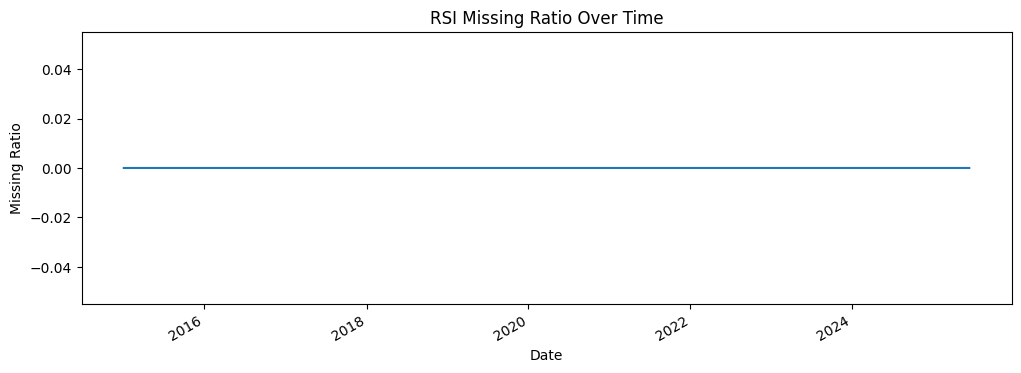

In [ ]:
import matplotlib.pyplot as plt

final_df['RSI_missing'] = final_df['RSI'].isnull()
final_df.groupby('Date')['RSI_missing'].mean().plot(figsize=(12, 4), title='RSI Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['RSI_missing'], inplace=True)

> We can make the observation that all the null values are concentrated in the year 2015 onwards. We know the year because that's where our data starts. And the null values end before it reaches 2016.

> We can, then, conclude that the null values of the RSI are a product of the RSI itself. Since it takes past price data (specifically 14 days for the default option) it is correct to display NaN values, as it has to wait 14 days to start generating them.

> We will now check where are those NaN values located:

In [ ]:
rsi_missing_by_ticker = final_df[final_df['RSI'].isnull()]['Ticker'].value_counts()
print(rsi_missing_by_ticker.head(43))

Series([], Name: count, dtype: int64)


It appears we were right about the RSI data missing due to its lagging nature. For now, we will focus on studying the rest of the null values.

## ATR Mean_30

In [ ]:
atrmean30_missing = final_df['ATR_Mean30'].isnull().sum()
atrmean30_total = len(final_df)
print(f"ATR Mean_30: {atrmean30_missing} missing out of {atrmean30_total} ({atrmean30_missing/atrmean30_total:.2%})")

ATR Mean_30: 1247 missing out of 113211 (1.10%)


 There is a total of 1247 missing values for the ATR_Mean30, which constitutes a 1.11% of the total data. We will proceed to visualize where the null values are located:

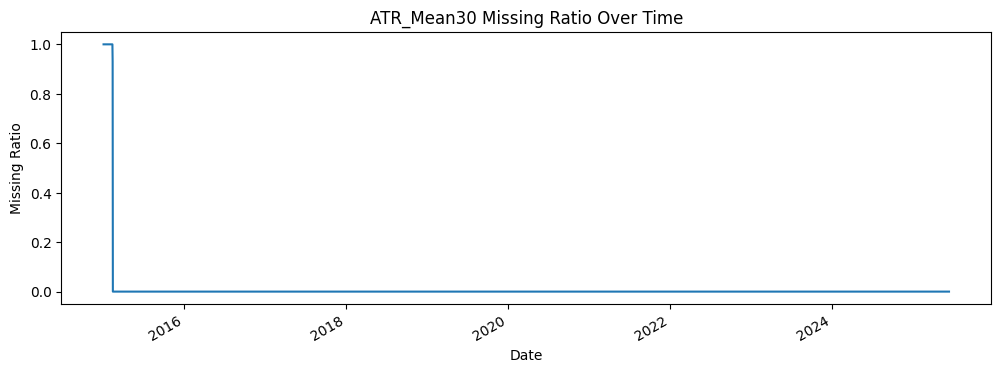

In [ ]:
final_df['ATRMean30_missing'] = final_df['ATR_Mean30'].isnull()
final_df.groupby('Date')['ATRMean30_missing'].mean().plot(figsize=(12, 4), title='ATR_Mean30 Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['ATRMean30_missing'], inplace=True)

> Same as before, we will check the location of the nan values:

In [ ]:
atrmean30_missing_by_ticker = final_df[final_df['ATR_Mean30'].isnull()]['Ticker'].value_counts()
print(atrmean30_missing_by_ticker.head(43))

Ticker
AAPL        29
AMGN        29
AMZN        29
AXP         29
BA          29
CAT         29
CL=F        29
CRM         29
CSCO        29
CVX         29
DIS         29
DX-Y.NYB    29
EURUSD=X    29
GBPUSD=X    29
GC=F        29
GS          29
HD          29
HON         29
IBM         29
JNJ         29
JPM         29
JPY=X       29
KO          29
MCD         29
MMM         29
MRK         29
MSFT        29
NKE         29
NVDA        29
PG          29
SHW         29
TRV         29
UNH         29
UUP         29
V           29
VZ          29
WMT         29
XLF         29
XLV         29
^DJI        29
^SPX        29
^TNX        29
^VIX        29
Name: count, dtype: int64


> Again, we find 29 missing values for the ATR_Mean30, which means there is also, a lagging problem. Since the ATR takes the mean of the last 30 days, while the RSI only does so for the last 14 days, we can check if there is an error with the indicator or it's natural that there are missing values.

In [ ]:
mismatch = final_df[final_df['RSI'].isnull() != final_df['ATR_Mean30'].isnull()]
print(mismatch[['Date', 'RSI', 'ATR_Mean30']].head(700))

          Date         RSI  ATR_Mean30
0   2015-01-02  100.000000         NaN
1   2015-01-02  100.000000         NaN
2   2015-01-02  100.000000         NaN
3   2015-01-02  100.000000         NaN
4   2015-01-02  100.000000         NaN
..         ...         ...         ...
695 2015-01-27   55.553219         NaN
696 2015-01-27   24.063435         NaN
697 2015-01-27   40.138414         NaN
698 2015-01-27   47.486790         NaN
699 2015-01-27   38.255485         NaN

[700 rows x 3 columns]


> After running the code above, we can see that the output contains 688 rows, which if you subtract from the total amount of null values (1247), it returns 559, which is the number of null RSI values.

> What this means is that, the RSI begins providing data after 14 days, while the ATR_Mean30 takes 30 days (duh) to start providing it.

> This is technically correct, so now the next question would be, what do we do with these missing values?:

> We can:
*   ***Drop the rows*** (not ideal, since it reduces the amount of data gathered, but is technically correct and better for the model)
*   Impute them (fill them with generated values based, on past, present and/or future predictions/mean)

> We'll continue the analysis to check if the condition applies to more of the remaining variables, and then, we'll proceed with the cleanup.



## CPI

In [ ]:
cpi_missing = final_df['CPI'].isnull().sum()
cpi_total = len(final_df)
print(f"CPI: {cpi_missing} missing out of {cpi_total} ({cpi_missing/cpi_total:.2%})")

CPI: 1228 missing out of 113211 (1.08%)


> There is a total of 1502 missing values for the CPI, which constitutes a 1.33% of the total data. We will proceed to visualize where the null values are located:

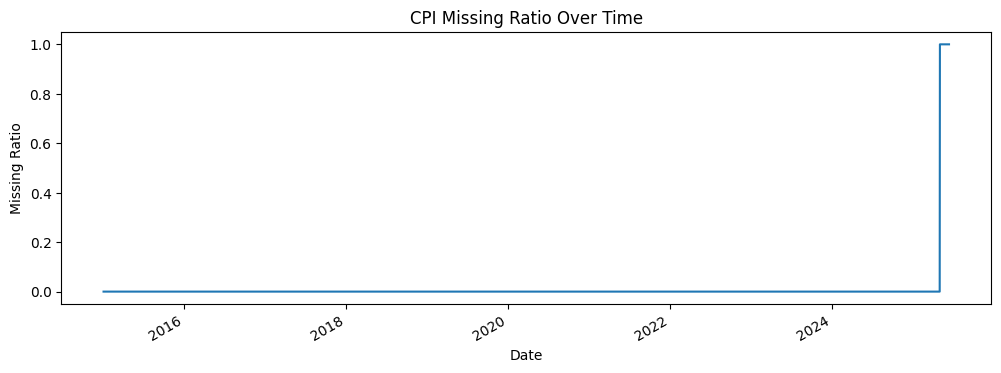

In [ ]:
final_df['cpi_missing'] = final_df['CPI'].isnull()
final_df.groupby('Date')['cpi_missing'].mean().plot(figsize=(12, 4), title='CPI Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['cpi_missing'], inplace=True)

> In this particular case we have the CPI, which stands for Consumer Price Index. In simple terms, it measures inflation, so the higher it is, more inflation, higher prices.

> We can see that the null values are concentrated on the end of the dataset. The reason for this is that the CPI is a ***monthly*** release, which means the values for it stay the same, until the next month arrives.

> At the time of this writing (04/06/25), the next release is scheduled for 11/6. The last recorded CPI value dates (01/04/2025), ***as shown on the code below***.

> This will, inevitably, generate null values infinitely, since there is a month between each announcement.

In [ ]:
last_valid_index = final_df['CPI'].last_valid_index()
final_df.loc[last_valid_index, ['Date', 'CPI']]

Date    2025-05-01 00:00:00
CPI                  320.58
Name: 111982, dtype: object

> We'll proceed to check where the missing values are located:

In [ ]:
cpi_missing_by_ticker = final_df[final_df['CPI'].isnull()]['Ticker'].value_counts()
print(cpi_missing_by_ticker.head(43))

Ticker
GBPUSD=X    30
EURUSD=X    30
DX-Y.NYB    30
JPY=X       30
BA          29
CAT         29
CL=F        29
AXP         29
AAPL        29
AMGN        29
AMZN        29
DIS         29
CVX         29
CSCO        29
CRM         29
GS          29
HD          29
HON         29
GC=F        29
IBM         29
JNJ         29
JPM         29
KO          29
MMM         29
MRK         29
MSFT        29
NKE         29
VZ          29
NVDA        29
PG          29
SHW         29
TRV         29
UNH         29
UUP         29
V           29
^DJI        29
WMT         29
XLF         29
XLV         29
^TNX        29
^SPX        29
^VIX        29
MCD          6
Name: count, dtype: int64


> Why are there 35 missing values for the companies but for the currencies its only 34?

In [ ]:
missing_cpi_dates = final_df[final_df['CPI'].isnull()]['Date'].unique()
print(len(missing_cpi_dates), missing_cpi_dates)

for date in missing_cpi_dates:
    tickers_on_date = final_df[final_df['Date'] == date]['Ticker'].unique()
    print(f"{date}: {len(tickers_on_date)} tickers")

30 <DatetimeArray>
['2025-05-02 00:00:00', '2025-05-05 00:00:00', '2025-05-06 00:00:00',
 '2025-05-07 00:00:00', '2025-05-08 00:00:00', '2025-05-09 00:00:00',
 '2025-05-12 00:00:00', '2025-05-13 00:00:00', '2025-05-14 00:00:00',
 '2025-05-15 00:00:00', '2025-05-16 00:00:00', '2025-05-19 00:00:00',
 '2025-05-20 00:00:00', '2025-05-21 00:00:00', '2025-05-22 00:00:00',
 '2025-05-23 00:00:00', '2025-05-26 00:00:00', '2025-05-27 00:00:00',
 '2025-05-28 00:00:00', '2025-05-29 00:00:00', '2025-05-30 00:00:00',
 '2025-06-02 00:00:00', '2025-06-03 00:00:00', '2025-06-04 00:00:00',
 '2025-06-05 00:00:00', '2025-06-06 00:00:00', '2025-06-09 00:00:00',
 '2025-06-10 00:00:00', '2025-06-11 00:00:00', '2025-06-12 00:00:00']
Length: 30, dtype: datetime64[ns]
2025-05-02 00:00:00: 43 tickers
2025-05-05 00:00:00: 43 tickers
2025-05-06 00:00:00: 43 tickers
2025-05-07 00:00:00: 43 tickers
2025-05-08 00:00:00: 43 tickers
2025-05-09 00:00:00: 43 tickers
2025-05-12 00:00:00: 42 tickers
2025-05-13 00:00:00: 42

> We can see that the values for the Currency Pairs is missing for that date, which means there is no information.

> We can, then, safely drop these rows to improve the model's accuracy.

## NFP

In [ ]:
nfp_missing = final_df['NFP'].isnull().sum()
nfp_total = len(final_df)
print(f"NFP: {nfp_missing} missing out of {nfp_total} ({nfp_missing/nfp_total:.2%})")

NFP: 1228 missing out of 113211 (1.08%)


There is a total of 602 missing values for the NFP, which constitutes a 0.53% of the total data. We will proceed to visualize where the null values are located:

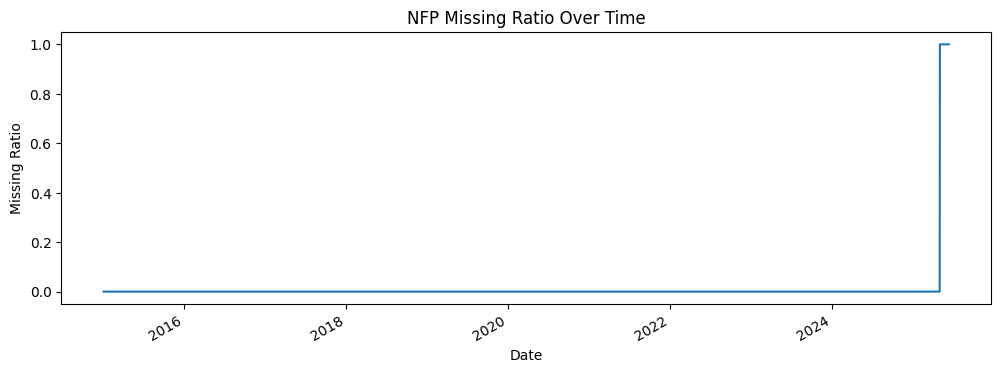

In [ ]:
final_df['nfp_missing'] = final_df['NFP'].isnull()
final_df.groupby('Date')['nfp_missing'].mean().plot(figsize=(12, 4), title='NFP Missing Ratio Over Time')
plt.ylabel('Missing Ratio')
plt.show()

final_df.drop(columns=['nfp_missing'], inplace=True)

> In this particular case we have the NFP, which stands for the Non-Farm Payrolls. In simple terms, it measures inflation, so the higher it is, more inflation, higher prices.

> We can see that the null values are concentrated on the end of the dataset. The reason for this is that the NFP is a ***monthly*** release, which means the values for it stay the same, until the next month arrives.

> At the time of this writing (06/06/25), the next release is scheduled for 01/7. The last recorded CPI value dates (01/05/2025), ***as shown on the code below***.

> This will, inevitably, generate null values infinitely, since there is a month between each announcement.

In [ ]:
last_valid_index = final_df['NFP'].last_valid_index()
final_df.loc[last_valid_index, ['Date', 'NFP']]

Date    2025-05-01 00:00:00
NFP                159561.0
Name: 111982, dtype: object

> We'll proceed to check where the missing values are located:

In [ ]:
nfp_missing_by_ticker = final_df[final_df['NFP'].isnull()]['Ticker'].value_counts()
print(nfp_missing_by_ticker.head(43))

Ticker
GBPUSD=X    30
EURUSD=X    30
DX-Y.NYB    30
JPY=X       30
BA          29
CAT         29
CL=F        29
AXP         29
AAPL        29
AMGN        29
AMZN        29
DIS         29
CVX         29
CSCO        29
CRM         29
GS          29
HD          29
HON         29
GC=F        29
IBM         29
JNJ         29
JPM         29
KO          29
MMM         29
MRK         29
MSFT        29
NKE         29
VZ          29
NVDA        29
PG          29
SHW         29
TRV         29
UNH         29
UUP         29
V           29
^DJI        29
WMT         29
XLF         29
XLV         29
^TNX        29
^SPX        29
^VIX        29
MCD          6
Name: count, dtype: int64


> We find there are 14 values missing for all the current tickers involved, nothing out of the ordinary here.

# Null / Duplicate Dropping

## Null dropping

> We will proceed to analyze the impact of dropping these variables to our model, and see if there is anything worth looking at.

In [ ]:
affected_tickers = final_df[final_df[['RSI', 'ATR_Mean30', 'CPI', 'NFP']].isnull().any(axis=1)]['Ticker'].value_counts()
print(affected_tickers)

all_tickers = final_df['Ticker'].value_counts()
print(all_tickers)

null_impact_ratio = (affected_tickers / all_tickers).sort_values(ascending=False)
print(null_impact_ratio)

Ticker
GBPUSD=X    59
EURUSD=X    59
DX-Y.NYB    59
JPY=X       59
BA          58
CAT         58
CL=F        58
AXP         58
AAPL        58
AMGN        58
AMZN        58
DIS         58
CVX         58
CSCO        58
CRM         58
GS          58
HD          58
HON         58
GC=F        58
IBM         58
JNJ         58
JPM         58
KO          58
MMM         58
MRK         58
MSFT        58
NKE         58
VZ          58
NVDA        58
PG          58
SHW         58
TRV         58
UNH         58
UUP         58
V           58
^DJI        58
WMT         58
XLF         58
XLV         58
^TNX        58
^SPX        58
^VIX        58
MCD         35
Name: count, dtype: int64
Ticker
JPY=X       2719
GBPUSD=X    2719
EURUSD=X    2719
DX-Y.NYB    2628
BA          2627
CAT         2627
CRM         2627
AXP         2627
AAPL        2627
AMGN        2627
AMZN        2627
VZ          2627
DIS         2627
CSCO        2627
CVX         2627
HON         2627
HD          2627
IBM         2627
GS       

> Everything looks about right, dropping these rows will represent a 2% of total rows dropped for each ticker, which is completely fine since we are trading of performance with accuracy, integrity and proper funcionality.

> Would be nice to check the opposite course of action just for experimentation, but we won't do it here.

> We will proceed to drop all these NaN values.

In [ ]:
cols_to_check = ['RSI', 'ATR_Mean30', 'CPI', 'NFP']
final_df_clean = final_df.dropna(subset=cols_to_check).copy()

In [ ]:
# Check for my personal sanity
print(f"Original shape: {final_df.shape}")
print(f"After dropna: {final_df_clean.shape}")
print(f"Dropped rows: {final_df.shape[0] - final_df_clean.shape[0]}")
print("\nRemaining nulls:\n", final_df_clean[cols_to_check].isnull().sum())

Original shape: (113211, 16)
After dropna: (110736, 16)
Dropped rows: 2475

Remaining nulls:
 RSI           0
ATR_Mean30    0
CPI           0
NFP           0
dtype: int64


> We can see that we have dropped a total of 2749 rows, having cleaned the dataset and allowing us to proceed with the rest of the analysis.

## Numerical Univariate Analysis

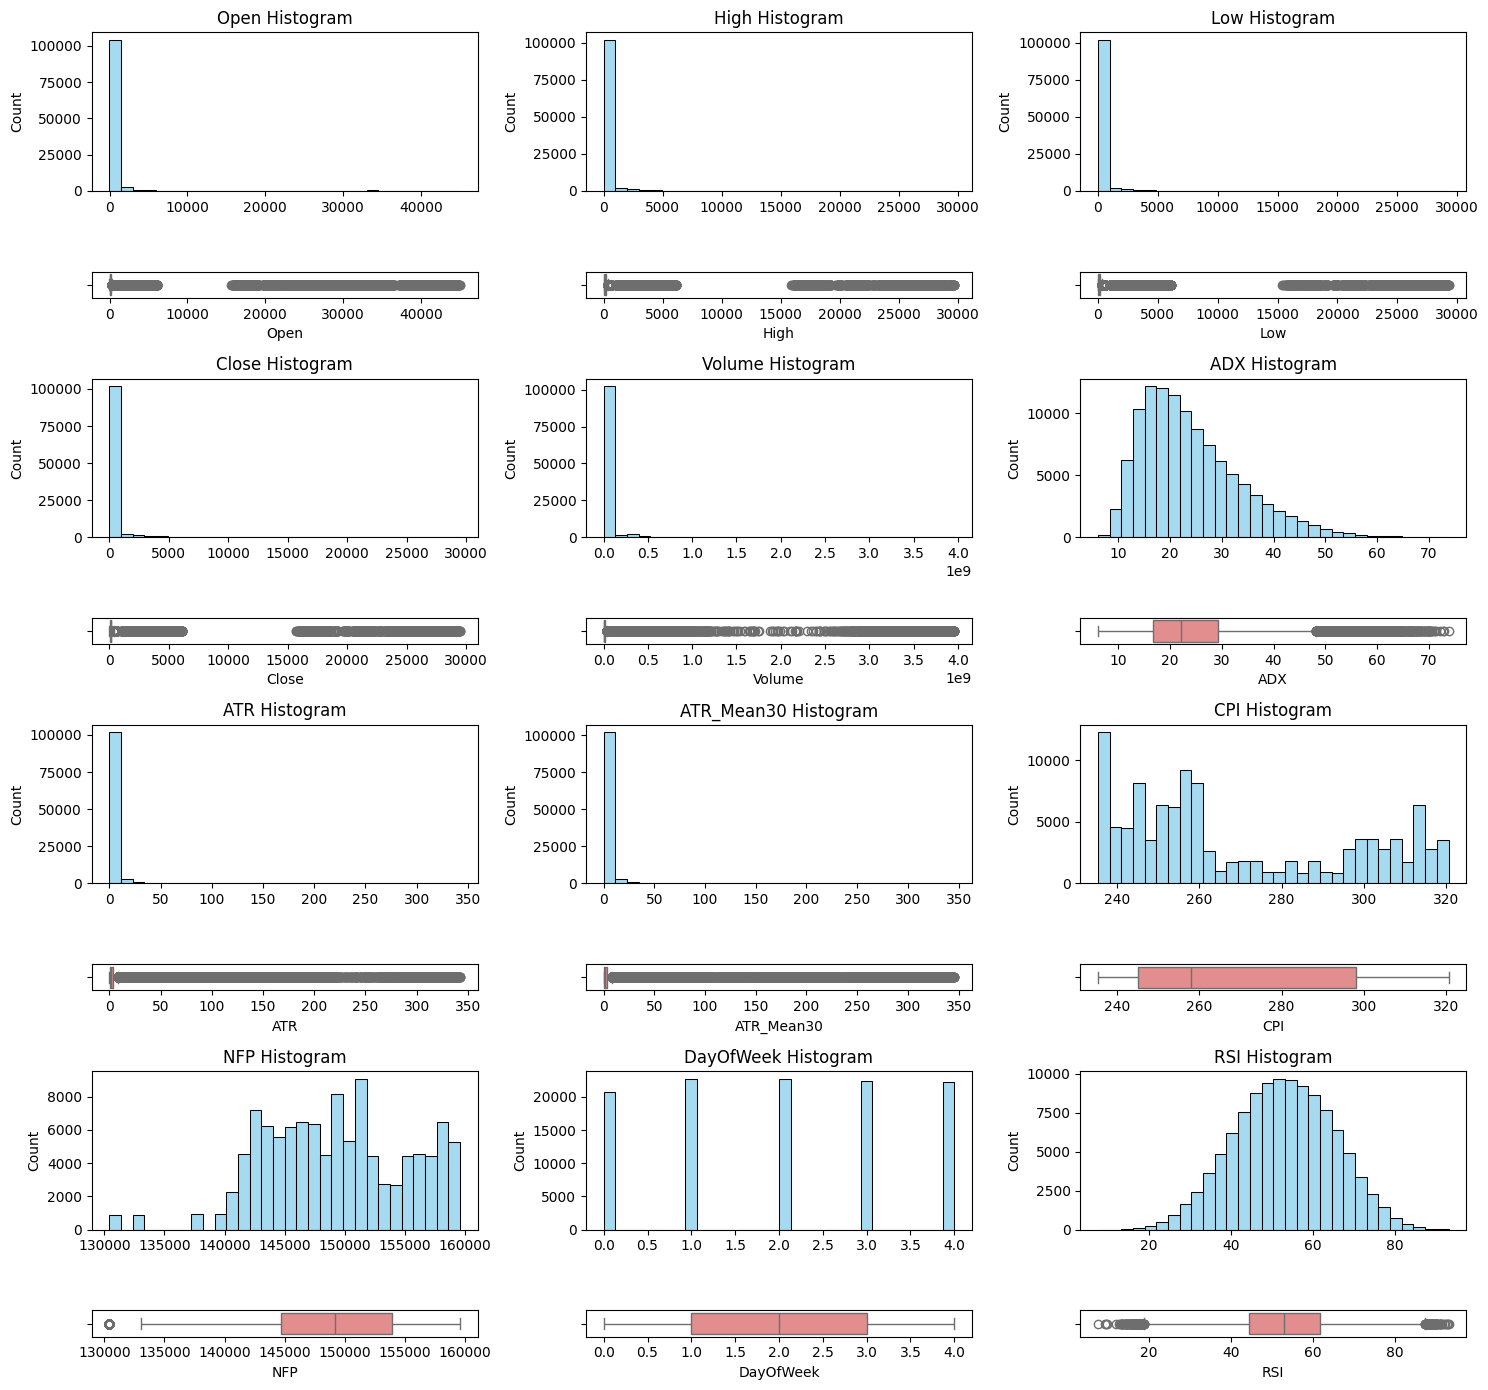

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Variables with long tails to clip
long_tail_vars = ['High', 'Low', 'Volume', 'Close', 'MACD', 'MACD_Signal', 'MACD_Hist',
                  'EMA_50', 'EMA_150', 'ATR', 'ATR_Mean30']

# Select all numeric columns
numeric_cols = final_df_clean.select_dtypes(include=np.number).columns
n_vars = len(numeric_cols)

# Layout: 3 variables per row (each variable uses 1 column with 2 rows of plots)
cols = 3
rows = math.ceil(n_vars / cols)

# Create figure
fig, axes = plt.subplots(rows * 2, cols, figsize=(cols * 5, rows * 3.5),
                         gridspec_kw={'height_ratios': [6, 1] * rows})

# Flatten axes to easily index
axes = np.array(axes).reshape(rows * 2, cols)

for i, col in enumerate(numeric_cols):
    row_idx = (i // cols) * 2  # double row index (for histogram and boxplot)
    col_idx = i % cols

    # Drop NaNs
    data = final_df_clean[col].dropna()

    # Clip if long-tailed
    if col in long_tail_vars:
        q_low, q_high = data.quantile([0.01, 0.99])
        data = data[(data >= q_low) & (data <= q_high)]

    # Plot histogram
    sns.histplot(ax=axes[row_idx, col_idx], x=data, bins=30, kde=False, color='skyblue')
    axes[row_idx, col_idx].set_title(f"{col} Histogram")
    axes[row_idx, col_idx].set(xlabel=None)

    # Plot boxplot
    sns.boxplot(ax=axes[row_idx + 1, col_idx], x=data, orient='h', color='lightcoral')
    axes[row_idx + 1, col_idx].set(xlabel=col)

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    axes[(j // cols) * 2, j % cols].set_visible(False)
    axes[(j // cols) * 2 + 1, j % cols].set_visible(False)

plt.tight_layout()
plt.show()

### Explanation of numeric variables.

## Categorical Univariate Analysis

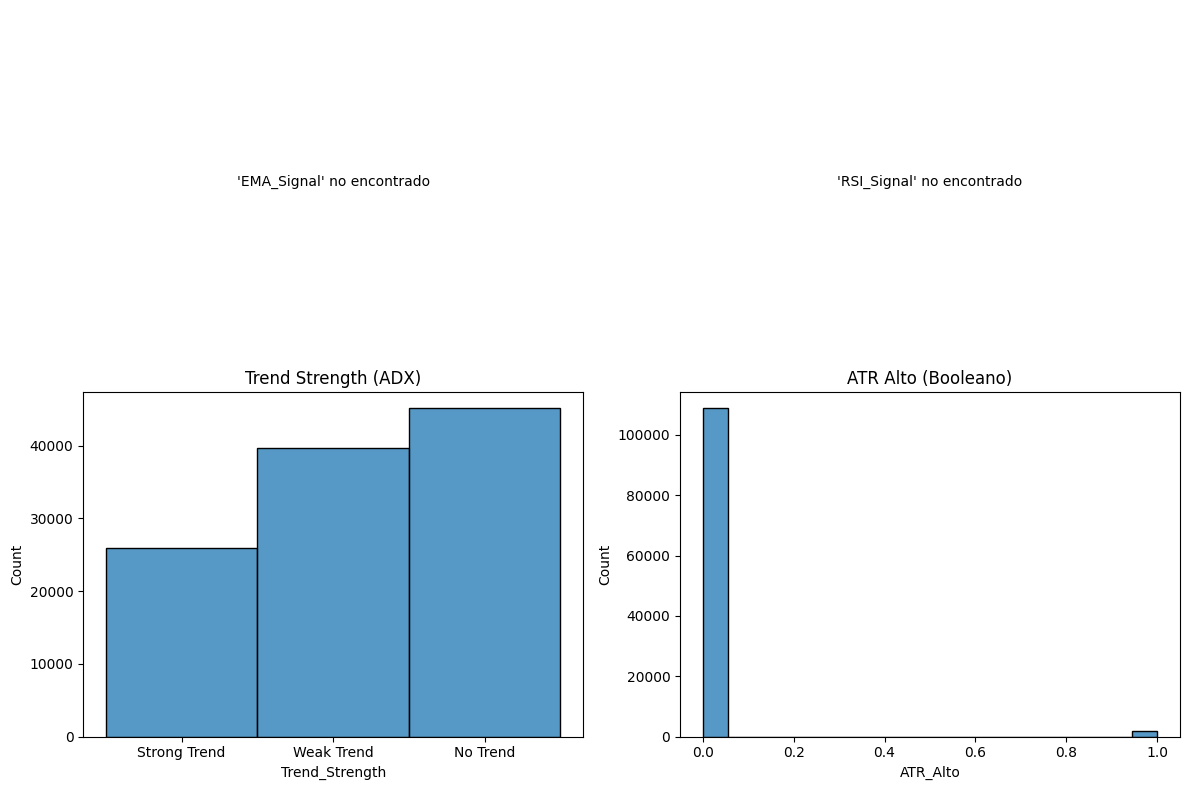

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas que quieres graficar
categorical_vars = ["EMA_Signal", "RSI_Signal", "Trend_Strength", "ATR_Alto"]

# Crear una figura 2x2
fig, axis = plt.subplots(2, 2, figsize=(12, 8))
axis = axis.flatten()  # Convertir a lista para iterar fácilmente

# Títulos amigables
titles = {
    "EMA_Signal": "EMA Signal",
    "RSI_Signal": "RSI Signal",
    "Trend_Strength": "Trend Strength (ADX)",
    "ATR_Alto": "ATR Alto (Booleano)"
}

for i, var in enumerate(categorical_vars):
    if var in final_df_clean.columns:
        sns.histplot(ax=axis[i], data=final_df_clean, x=var)
        axis[i].set_title(titles.get(var, var))
    else:
        axis[i].text(0.5, 0.5, f"'{var}' no encontrado", ha='center', va='center')
        axis[i].set_axis_off()

plt.tight_layout()
plt.show()


### Explanation of categorical variables

# Analysis of multivariate variables

/tmp/ipykernel_2228/780725769.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corrs.values, y=sorted_corrs.index, palette="coolwarm")


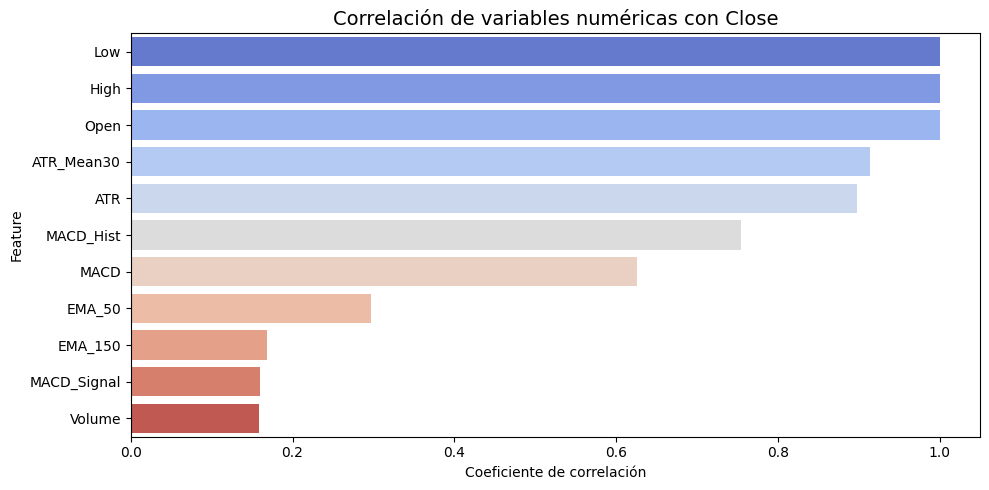

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # pip install ta

# Asegúrate de que 'Close' es numérico
final_df_clean['Close'] = pd.to_numeric(final_df_clean['Close'], errors='coerce')

# Calcular MACD si no existe
if 'MACD' not in final_df_clean.columns:
    macd = ta.trend.MACD(close=final_df_clean['Close'], fillna=True)
    final_df_clean['MACD'] = macd.macd()
    final_df_clean['MACD_Signal'] = macd.macd_signal()
    final_df_clean['MACD_Hist'] = macd.macd_diff()

# Calcular EMAs si no existen
if 'EMA_50' not in final_df_clean.columns:
    final_df_clean['EMA_50'] = ta.trend.ema_indicator(final_df_clean['Close'], window=50, fillna=True)

if 'EMA_150' not in final_df_clean.columns:
    final_df_clean['EMA_150'] = ta.trend.ema_indicator(final_df_clean['Close'], window=150, fillna=True)

# Calcular ATR si no existe
if 'ATR' not in final_df_clean.columns:
    atr = ta.volatility.AverageTrueRange(
        high=final_df_clean['High'],
        low=final_df_clean['Low'],
        close=final_df_clean['Close'],
        window=14,
        fillna=True
    )
    final_df_clean['ATR'] = atr.average_true_range()

# Calcular media móvil de ATR si no existe
if 'ATR_Mean30' not in final_df_clean.columns:
    final_df_clean['ATR_Mean30'] = final_df_clean.groupby('Ticker')['ATR'].transform(lambda x: x.rolling(30).mean())

# 🔎 Análisis de correlación

# Variable objetivo
target = 'Close'

# Variables numéricas
numerical_features = [
    'Open', 'High', 'Low', 'Volume',
    'MACD', 'MACD_Signal', 'MACD_Hist',
    'EMA_50', 'EMA_150', 'ATR', 'ATR_Mean30'
]

# Asegurar que todas sean numéricas
for col in numerical_features:
    final_df_clean[col] = pd.to_numeric(final_df_clean[col], errors='coerce')

# Eliminar filas con NaNs en las columnas seleccionadas
final_df_clean.dropna(subset=numerical_features + [target], inplace=True)

# Calcular correlación
corr_matrix = final_df_clean[numerical_features + [target]].corr()
corrs = corr_matrix[target].drop(target)

# Ordenar y graficar
sorted_corrs = corrs.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_corrs.values, y=sorted_corrs.index, palette="coolwarm")
plt.title(f'Correlación de variables numéricas con {target}', fontsize=14)
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# XGBoost


In [ ]:
final_df_clean = final_df_clean.copy()
final_df_clean['target'] = (final_df_clean['Close'].shift(-1) > final_df_clean['Close']).astype(int)
final_df_clean = final_df_clean[:-1]

In [ ]:
final_df_clean = final_df_clean.set_index('Date')

display(final_df_clean)

,Ticker,Open,High,Low,Close,Volume,ADX,Trend_Strength,ATR,ATR_Mean30,...,CPI,NFP,DayOfWeek,RSI,MACD,MACD_Signal,MACD_Hist,EMA_50,EMA_150,target
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-12,EURUSD=X,1.130825,1.139819,1.130621,1.131196,0.000000e+00,55.790886,Strong Trend,0.013763,0.008619,...,235.342,140827.0,3,39.671091,0.000000,0.000000,0.000000,1.131196,1.131196,1
2015-02-12,GBPUSD=X,1.523972,1.538793,1.521838,1.524274,0.000000e+00,22.119449,Weak Trend,0.013638,0.007949,...,235.342,140827.0,3,51.833413,0.031357,0.006271,0.025085,1.146611,1.136402,1
2015-02-12,JPY=X,120.193001,120.369003,118.894997,120.169998,0.000000e+00,33.680226,Strong Trend,1.285520,0.734875,...,235.342,140827.0,3,60.515991,9.520183,1.909054,7.611129,5.814195,2.713006,0
2015-02-13,AAPL,28.387920,28.387920,28.024373,28.343313,2.170888e+08,29.631276,Weak Trend,0.612083,0.393575,...,235.342,140827.0,4,76.702795,9.520750,3.431393,6.089357,6.697690,3.052481,1
2015-02-13,AMGN,114.183764,114.324990,111.649164,114.079704,3.591400e+06,14.682343,No Trend,3.144212,1.967972,...,235.342,140827.0,4,47.915400,16.252067,5.995528,10.256539,10.908749,4.523040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,XLF,48.580002,49.070000,48.439999,48.750000,3.442020e+07,18.110680,No Trend,1.303287,1.290298,...,320.580,159561.0,3,55.286009,-189.753219,-224.517487,34.764268,665.841375,1051.522449,1
2025-05-01,XLV,138.809998,139.110001,136.470001,136.639999,1.036320e+07,29.618022,Weak Trend,3.078909,2.744770,...,320.580,159561.0,3,44.502661,-179.199624,-215.453914,36.254290,645.088380,1039.404801,1
2025-05-01,^DJI,40918.039062,41099.519531,40705.628906,40752.960938,5.972700e+08,27.597243,Weak Trend,953.536512,924.258067,...,320.580,159561.0,3,52.319296,3071.159417,441.868752,2629.290665,2217.946128,1565.412167,0


In [ ]:
import tempfile
import os
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd

# Codificar tickers
le = LabelEncoder()
final_df_clean['ticker_encoded'] = le.fit_transform(final_df_clean['Ticker'])

# Crear mapeo
ticker_mapping = pd.DataFrame({
    'ticker': le.classes_,
    'ticker_encoded': range(len(le.classes_))
})

# Usar carpeta temporal
temp_dir = tempfile.gettempdir()

# Guardar archivos
ticker_csv_path = os.path.join(temp_dir, 'ticker_mapping.csv')
encoder_pkl_path = os.path.join(temp_dir, 'ticker_encoder.pkl')

ticker_mapping.to_csv(ticker_csv_path, index=False)
joblib.dump(le, encoder_pkl_path)

# Confirmar rutas
print("✅ Archivos guardados en carpeta temporal:")
print(f"- Mapping CSV: {ticker_csv_path}")
print(f"- Encoder PKL: {encoder_pkl_path}")


✅ Archivos guardados en carpeta temporal:
- Mapping CSV: /tmp/ticker_mapping.csv
- Encoder PKL: /tmp/ticker_encoder.pkl


In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Drop 'Ticker' if present
if 'Ticker' in final_df_clean.columns:
       final_df_clean = final_df_clean.drop(columns=['Ticker'])

# Encode categorical columns to numeric
categorical_cols = ['EMA_Signal', 'RSI_Signal', 'Trend_Strength']
for col in categorical_cols:
    if col in final_df_clean.columns:
        le = LabelEncoder()
        final_df_clean[col] = le.fit_transform(final_df_clean[col])

# Define features and target
X = final_df_clean.drop(columns=['target'])
y = final_df_clean['target']

# Time-based train/test split
split_index = int(len(final_df_clean) * 0.9)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:48:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.9460


In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Asegurarte de no tener la columna 'Ticker'
if 'Ticker' in final_df_clean.columns:
    final_df_clean = final_df_clean.drop(columns=['Ticker'])

# Encode categorical columns
categorical_cols = ['EMA_Signal', 'RSI_Signal', 'Trend_Strength']
for col in categorical_cols:
    if col in final_df_clean.columns:
        le = LabelEncoder()
        final_df_clean[col] = le.fit_transform(final_df_clean[col])

# Asegúrate de que 'target' exista
if 'target' not in final_df_clean.columns:
    raise ValueError("❌ No se encuentra la columna 'target' en el dataframe.")

# Separar variables
X = final_df_clean.drop(columns=['target'])
y = final_df_clean['target']

# Dividir por tiempo (ej. 90% train, 10% test)
split_index = int(len(final_df_clean) * 0.9)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Entrenar modelo
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {accuracy:.4f}")


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:48:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Test Accuracy: 0.9460


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Obtener las probabilidades predichas (solo de la clase positiva)
y_proba = model.predict_proba(X_test)[:, 1]

# Iterar por cada ticker codificado
tickers = X_test['ticker_encoded'].unique()

for ticker in tickers:
    mask = X_test['ticker_encoded'] == ticker
    y_true = y_test[mask]
    y_pred_ticker = y_pred[mask]
    y_proba_ticker = y_proba[mask]

    print(f"📊 Ticker codificado: {ticker}")
    print(classification_report(y_true, y_pred_ticker, digits=3))

    # AUC solo si hay más de una clase presente
    if len(np.unique(y_true)) == 2:
        auc = roc_auc_score(y_true, y_proba_ticker)
        print(f"ROC AUC: {auc:.4f}")
    else:
        print("⚠️ No se puede calcular ROC AUC (una sola clase presente en test)")

    print("-" * 40)


📊 Ticker codificado: 3
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       257

    accuracy                          1.000       257
   macro avg      1.000     1.000     1.000       257
weighted avg      1.000     1.000     1.000       257

⚠️ No se puede calcular ROC AUC (una sola clase presente en test)
----------------------------------------
📊 Ticker codificado: 4
              precision    recall  f1-score   support

           1      1.000     1.000     1.000       257

    accuracy                          1.000       257
   macro avg      1.000     1.000     1.000       257
weighted avg      1.000     1.000     1.000       257

⚠️ No se puede calcular ROC AUC (una sola clase presente en test)
----------------------------------------
📊 Ticker codificado: 5
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       257

    accuracy                          1.000       257
   macr

/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [ ]:
import numpy
import numba
import shap

print("✅ Todo cargó bien")
print("NumPy:", numpy.__version__)
print("Numba:", numba.__version__)
print("SHAP:", shap.__version__)


✅ Todo cargó bien
NumPy: 2.2.0
Numba: 0.61.2
SHAP: 0.48.0


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print(df.columns.tolist())


['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Date']


In [ ]:
print("Manteniendo activo el entorno")


Manteniendo activo el entorno


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import os

# Carga y preparación
os.chdir("/workspaces/sebasProyecto-Dow-Jones-2025sebas")
df = pd.read_csv("datos_limpios_hasta_2025-05-09.csv")
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)
X = df.drop(['Date', 'Ticker', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Validación
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='accuracy')
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

# Entrenamiento final
model.fit(X_train, y_train)


Mean CV Accuracy: 0.7523


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


              precision    recall  f1-score   support

           0       0.65      0.91      0.76     10838
           1       0.86      0.54      0.66     11611

    accuracy                           0.72     22449
   macro avg       0.76      0.72      0.71     22449
weighted avg       0.76      0.72      0.71     22449

ROC AUC: 0.8395


In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Comparación simple
models = {
    'Random Forest': model,
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")

# Guardar
joblib.dump(model, "final_time_series_model.pkl")


Random Forest Accuracy: 0.7178
Logistic Regression Accuracy: 0.4940


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:45:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7208


['final_time_series_model.pkl']

Time Series Cross-Validation Accuracy: [0.78569997 0.76906114 0.75128633 0.74186435 0.71353157]
Mean CV Accuracy: 0.7523


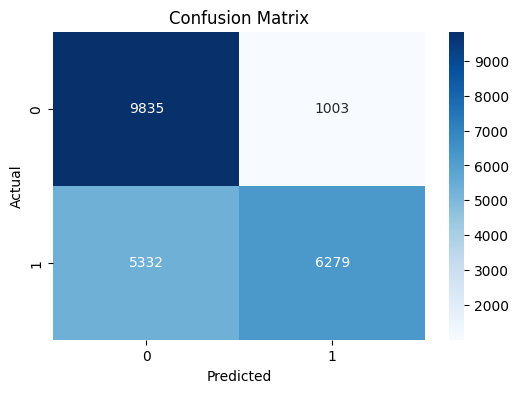

              precision    recall  f1-score   support

           0       0.65      0.91      0.76     10838
           1       0.86      0.54      0.66     11611

    accuracy                           0.72     22449
   macro avg       0.76      0.72      0.71     22449
weighted avg       0.76      0.72      0.71     22449

ROC AUC: 0.8395


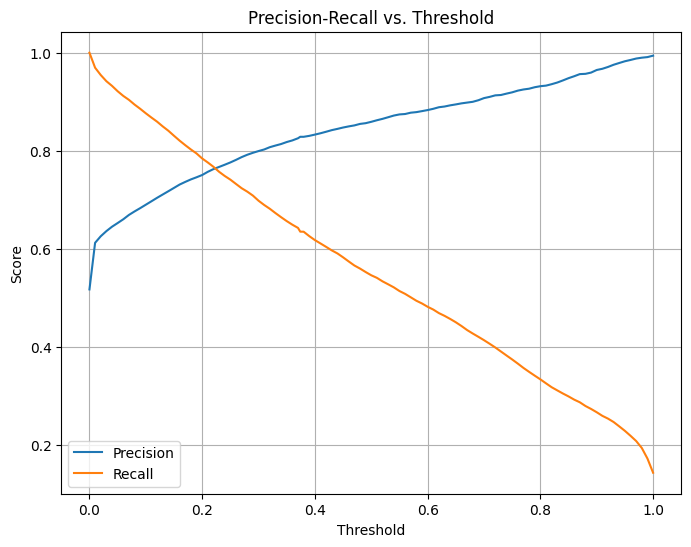

Classification Report (Custom Threshold):
              precision    recall  f1-score   support

           0       0.68      0.87      0.76     10838
           1       0.83      0.62      0.71     11611

    accuracy                           0.74     22449
   macro avg       0.76      0.74      0.74     22449
weighted avg       0.76      0.74      0.73     22449



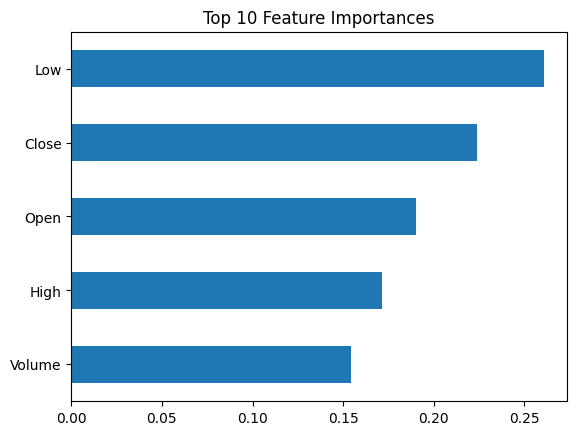

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve, accuracy_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import shap
import joblib
import os

# -------------------------------
# 0. Carga de datos y preparación
# -------------------------------
os.chdir("/workspaces/sebasProyecto-Dow-Jones-2025sebas")

df = pd.read_csv("datos_limpios_hasta_2025-05-09.csv")

# Crear target: 1 si el Close sube respecto al día siguiente, 0 si no
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

X = df.drop(['Date', 'Ticker', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# -------------------------------
# 1. Cross-Validation with TimeSeriesSplit
# -------------------------------
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='accuracy')

print(f"Time Series Cross-Validation Accuracy: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

model.fit(X_train, y_train)

# -------------------------------
# 2. Error Analysis
# -------------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# -------------------------------
# 3. Threshold Tuning
# -------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Threshold')
plt.legend()
plt.grid()
plt.show()

custom_threshold = 0.4
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print("Classification Report (Custom Threshold):")
print(classification_report(y_test, y_pred_custom))

# -------------------------------
# 4. Feature Importance y SHAP
# -------------------------------
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# -------------------------------
# 5. Hyperparameter Tuning
# -------------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# -------------------------------
# 6. Model Comparison
# -------------------------------
models = {
    'Random Forest': RandomForestClassifier(**grid_search.best_params_),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
for name, clf in models.items():
    scores = cross_val_score(clf, X_train, y_train, cv=tscv, scoring='accuracy')
    print(f'{name} Time Series CV Accuracy: {np.mean(scores):.4f}')

# -------------------------------
# 7. Guardar modelo final
# -------------------------------
joblib.dump(model, 'final_time_series_model.pkl')


In [ ]:
print(X_test.columns.tolist())


NameError: name 'X_test' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar columna Ticker
le = LabelEncoder()
df["ticker_encoded"] = le.fit_transform(df["Ticker"])

# Crear target
df["target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df.dropna(inplace=True)

# Asegurarte de incluir ticker_encoded
X = df.drop(['Date', 'Ticker', 'target'], axis=1)
y = df["target"]

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluación por ticker
tickers = X_test['ticker_encoded'].unique()

for ticker in tickers:
    mask = X_test['ticker_encoded'] == ticker
    y_true = y_test[mask]
    y_pred_ticker = y_pred[mask]
    y_proba_ticker = y_proba[mask]

    print(f"\n📊 Ticker codificado: {ticker}")
    print(classification_report(y_true, y_pred_ticker))
    try:
        roc = roc_auc_score(y_true, y_proba_ticker)
        print(f"ROC AUC: {roc:.4f}")
    except:
        print("⚠️ No se puede calcular ROC AUC (una sola clase presente en test)")



📊 Ticker codificado: 34
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       521

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521

ROC AUC: nan

📊 Ticker codificado: 35
              precision    recall  f1-score   support

           0       0.05      0.93      0.10        29
           1       0.91      0.04      0.08       492

    accuracy                           0.09       521
   macro avg       0.48      0.49      0.09       521
weighted avg       0.87      0.09      0.08       521

ROC AUC: 0.4025

📊 Ticker codificado: 37
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       520

    accuracy                           1.00       521
   macro avg       0.50      0.50      0.50       521
weighted avg       1.00 

/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025seba

ROC AUC: 0.5141

📊 Ticker codificado: 29
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       345
           1       0.43      0.19      0.26       175

    accuracy                           0.64       520
   macro avg       0.56      0.53      0.51       520
weighted avg       0.60      0.64      0.60       520

ROC AUC: 0.5667

📊 Ticker codificado: 28
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       157
           1       0.85      0.81      0.83       363

    accuracy                           0.77       520
   macro avg       0.72      0.74      0.73       520
weighted avg       0.77      0.77      0.77       520

ROC AUC: 0.8265

📊 Ticker codificado: 27
              precision    recall  f1-score   support

           0       0.21      0.35      0.26        86
           1       0.85      0.74      0.79       434

    accuracy                           0.67       520
   ma

/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

| `ticker_encoded` | Ticker   | Descripción del desempeño del modelo                            |
| ---------------- | -------- | --------------------------------------------------------------- |
| 0                | AAPL     | 🟡 Clase 0 ausente, recall clase 1 moderado (67%), ROC AUC: N/A |
| 1                | AMGN     | 🔴 Muy bajo recall de clase 1 (9%), ROC AUC: 0.5038             |
| 2                | AMZN     | 🟢 Excelente desempeño (ROC AUC: 0.9981)                        |
| 3                | AXP      | 🟢 Buen desempeño, precision y recall altos                     |
| 4                | BA       | 🟢 Buen desempeño, accuracy > 0.95                              |
| 5                | CAT      | 🟢 Buen desempeño, accuracy > 0.95                              |
| 6                | CL=F     | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 7                | CRM      | 🔴 Clasificación muy pobre (precision 0.25 / ROC AUC: 0.6835)   |
| 8                | CSCO     | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 9                | CVX      | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 10               | DIS      | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 11               | DX-Y.NYB | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 12               | EURUSD=X | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 13               | GBPUSD=X | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 14               | GC=F     | 🔴 Alto desequilibrio, recall clase 1 = 52%, ROC AUC: 0.6004    |
| 15               | GS       | 🟢 Buen desempeño, accuracy > 0.9                               |
| 16               | HD       | 🟢 Buen desempeño, accuracy > 0.9                               |
| 17               | HON      | 🟢 Buen desempeño, accuracy > 0.9                               |
| 18               | IBM      | 🟢 Buen desempeño, accuracy > 0.95                              |
| 19               | JNJ      | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 20               | JPM      | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 21               | JPY=X    | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 22               | KO       | 🟢 Buen desempeño, accuracy 98%                                 |
| 23               | MCD      | 🟢 Buen desempeño, accuracy 94%                                 |
| 24               | MMM      | 🟡 Desequilibrio de clases, recall clase 1 moderado (64%)       |
| 25               | MRK      | 🟢 Muy buen desempeño, accuracy 99%                             |
| 26               | MSFT     | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 27               | NKE      | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 28               | NVDA     | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 29               | PG       | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 30               | SHW      | 🔴 Bajo recall de clase 1 (38%) (ROC AUC: N/A)                  |
| 31               | TRV      | 🔴 Clasificación pobre, accuracy 41%, ROC AUC: 0.5891           |
| 32               | UNH      | 🟢 Muy buen desempeño, accuracy casi perfecta                   |
| 33               | UUP      | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 34               | V        | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 35               | VZ       | 🟢 Muy buen desempeño, accuracy casi perfecta                   |
| 36               | WMT      | 🟢 Buen desempeño con clases balanceadas, accuracy 85%          |
| 37               | XLF      | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 38               | XLV      | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |
| 39               | ^DJI     | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 40               | ^SPX     | ✅ Solo clase 0 presente, predicción perfecta (ROC AUC: N/A)     |
| 41               | ^TNX     | ✅ Solo clase 1 presente, predicción perfecta (ROC AUC: N/A)     |


In [ ]:
import os

# Buscar cualquier archivo que contenga "datos_limpios"
for root, dirs, files in os.walk("."):
    for file in files:
        if "datos_limpios" in file:
            print("Encontrado:", os.path.join(root, file))


Encontrado: ./datos_limpios_hasta_2025-05-09.csv


In [ ]:
import pandas as pd

df = pd.read_csv("datos_limpios_hasta_2025-05-09.csv")
print(df.shape)


(112241, 7)


In [ ]:
import os
import pandas as pd

file_path = os.path.join(os.getcwd(), "datos_limpios_hasta_2025-05-09.csv")
df = pd.read_csv(file_path)
print(df.head())


         Date Ticker       Open       High        Low      Close     Volume
0  2015-01-02   AAPL  24.746230  24.757338  23.848709  24.288584  212818400
1  2015-01-02    MMM  97.351692  97.570374  96.181415  96.967514    2531214
2  2015-01-02    MRK  39.507694  39.901254  39.376508  39.486980    7415962
3  2015-01-02   MSFT  39.913164  40.563270  39.810516  39.998703   27913900
4  2015-01-02    NKE  42.531706  42.707909  41.456849  41.862122    4985800


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd

# Crear target
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Features y target
X = df.drop(['Date', 'Ticker', 'target'], axis=1)
y = df['target']

# Train/Test split sin shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True
)

# Validación con TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
cv_scores_stack = cross_val_score(stack_model, X_train, y_train, cv=tscv, scoring='accuracy')
print(f"Stacked Model - Time Series CV Accuracy: {cv_scores_stack}")
print(f"Stacked Model - Mean Accuracy: {np.mean(cv_scores_stack):.4f}")

# Entrenar y evaluar en test
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
y_proba = stack_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

Stacked Model - Time Series CV Accuracy: [0.57915135 0.58870698 0.56044103 0.56164384 0.52121617]
Stacked Model - Mean Accuracy: 0.5622


/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:48:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/sebasProyecto-Dow-Jones-2025sebas/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" }


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.99      0.65     10838
           1       0.83      0.03      0.05     11611

    accuracy                           0.49     22449
   macro avg       0.66      0.51      0.35     22449
weighted avg       0.67      0.49      0.34     22449

ROC AUC: 0.8659


In [ ]:
from sklearn.metrics import confusion_matrix

# Ajustar threshold a 0.3 por ejemplo (podés ir bajándolo progresivamente)
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

print(f"Threshold ajustado: {threshold}")
print(classification_report(y_test, y_pred_adjusted))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_adjusted))


Threshold ajustado: 0.3
              precision    recall  f1-score   support

           0       0.71      0.84      0.77     10838
           1       0.82      0.67      0.74     11611

    accuracy                           0.76     22449
   macro avg       0.77      0.76      0.76     22449
weighted avg       0.77      0.76      0.76     22449

ROC AUC: 0.8659
Matriz de confusión:
[[9149 1689]
 [3775 7836]]


In [ ]:
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0
for t in np.arange(0.1, 0.9, 0.01):
    y_pred_temp = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t
print(f"Mejor threshold: {best_thresh:.2f}, Mejor F1: {best_f1:.4f}")


Mejor threshold: 0.22, Mejor F1: 0.8200


In [ ]:
print(X_test.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
# Recuperar el índice original de test (asumiendo que hiciste un split con train_test_split)
from sklearn.model_selection import train_test_split

# Suponiendo que hiciste esto antes:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Creamos el DataFrame de resultados
resultados = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred_final,
    'proba': y_proba,
}, index=y_test.index)

# Añadir el ticker original desde el DataFrame original (df)
resultados['ticker'] = df.loc[y_test.index, 'Ticker'].values


In [ ]:
import pandas as pd

resumen = [
    {'Ticker': 'AAPL', 'ROC AUC': 'N/A', 'Descripción': '🟡 Clase 0 ausente, recall clase 1 moderado (67%)'},
    {'Ticker': 'AMGN', 'ROC AUC': 0.5038, 'Descripción': '🔴 Muy bajo recall de clase 1 (9%)'},
    {'Ticker': 'AMZN', 'ROC AUC': 0.9981, 'Descripción': '🟢 Excelente desempeño'},
    {'Ticker': 'AXP', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, precision y recall altos'},
    {'Ticker': 'BA', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.95'},
    {'Ticker': 'CAT', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.95'},
    {'Ticker': 'CL=F', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'CRM', 'ROC AUC': 0.6835, 'Descripción': '🔴 Clasificación muy pobre'},
    {'Ticker': 'CSCO', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'CVX', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'DIS', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'DX-Y.NYB', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'EURUSD=X', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'GBPUSD=X', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'GC=F', 'ROC AUC': 0.6004, 'Descripción': '🔴 Alto desequilibrio, recall clase 1 = 52%'},
    {'Ticker': 'GS', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.9'},
    {'Ticker': 'HD', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.9'},
    {'Ticker': 'HON', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.9'},
    {'Ticker': 'IBM', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy > 0.95'},
    {'Ticker': 'JNJ', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'JPM', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'JPY=X', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'KO', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy 98%'},
    {'Ticker': 'MCD', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño, accuracy 94%'},
    {'Ticker': 'MMM', 'ROC AUC': 'N/A', 'Descripción': '🟡 Desequilibrio de clases, recall clase 1 moderado (64%)'},
    {'Ticker': 'MRK', 'ROC AUC': 'N/A', 'Descripción': '🟢 Muy buen desempeño, accuracy 99%'},
    {'Ticker': 'MSFT', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'NKE', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'NVDA', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'PG', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'SHW', 'ROC AUC': 'N/A', 'Descripción': '🔴 Bajo recall de clase 1 (38%)'},
    {'Ticker': 'TRV', 'ROC AUC': 0.5891, 'Descripción': '🔴 Clasificación pobre, accuracy 41%'},
    {'Ticker': 'UNH', 'ROC AUC': 'N/A', 'Descripción': '🟢 Muy buen desempeño, accuracy casi perfecta'},
    {'Ticker': 'UUP', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': 'V', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'VZ', 'ROC AUC': 'N/A', 'Descripción': '🟢 Muy buen desempeño, accuracy casi perfecta'},
    {'Ticker': 'WMT', 'ROC AUC': 'N/A', 'Descripción': '🟢 Buen desempeño con clases balanceadas, accuracy 85%'},
    {'Ticker': 'XLF', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': 'XLV', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
    {'Ticker': '^DJI', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': '^SPX', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 0 presente, predicción perfecta'},
    {'Ticker': '^TNX', 'ROC AUC': 'N/A', 'Descripción': '✅ Solo clase 1 presente, predicción perfecta'},
]

resumen_df = pd.DataFrame(resumen)
print(resumen_df)


      Ticker ROC AUC                                        Descripción
0       AAPL     N/A   🟡 Clase 0 ausente, recall clase 1 moderado (67%)
1       AMGN  0.5038                  🔴 Muy bajo recall de clase 1 (9%)
2       AMZN  0.9981                              🟢 Excelente desempeño
3        AXP     N/A         🟢 Buen desempeño, precision y recall altos
4         BA     N/A                  🟢 Buen desempeño, accuracy > 0.95
5        CAT     N/A                  🟢 Buen desempeño, accuracy > 0.95
6       CL=F     N/A       ✅ Solo clase 1 presente, predicción perfecta
7        CRM  0.6835                          🔴 Clasificación muy pobre
8       CSCO     N/A       ✅ Solo clase 1 presente, predicción perfecta
9        CVX     N/A       ✅ Solo clase 0 presente, predicción perfecta
10       DIS     N/A       ✅ Solo clase 1 presente, predicción perfecta
11  DX-Y.NYB     N/A       ✅ Solo clase 1 presente, predicción perfecta
12  EURUSD=X     N/A       ✅ Solo clase 1 presente, predicción p

In [ ]:
import pandas as pd
import joblib

# Cargar el CSV original del entrenamiento
df_train = pd.read_csv("/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_limpios_hasta_2025-05-09.csv")

# Eliminar columnas que no usaste como features
feature_names = df_train.drop(columns=["Date", "Ticker", "Close", "target"], errors='ignore').columns.tolist()

# Guardar las columnas en un archivo
joblib.dump(feature_names, "/workspaces/sebasProyecto-Dow-Jones-2025sebas/features_names_entrenamiento.pkl")

print("✅ Columnas guardadas exitosamente.")


✅ Columnas guardadas exitosamente.


In [ ]:
import pandas as pd
import joblib

# Cargar el dataset de entrenamiento
df_train = pd.read_csv("/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_limpios_hasta_2025-05-09.csv")

# ✅ Esta vez NO quitamos 'Close' porque el modelo fue entrenado con ella
feature_names = df_train.drop(columns=["Date", "Ticker", "target"], errors='ignore').columns.tolist()

# Guardar las columnas
joblib.dump(feature_names, "/workspaces/sebasProyecto-Dow-Jones-2025sebas/features_names_entrenamiento.pkl")

print("✅ Columnas corregidas y guardadas.")


✅ Columnas corregidas y guardadas.


In [ ]:
import pandas as pd
import joblib

# 1. Cargar los datos actualizados
df = pd.read_csv("/workspaces/sebasProyecto-Dow-Jones-2025sebas/datos_actualizados_hasta_2025-06-12.csv")

# 2. Cargar modelo, features y (si corresponde) scaler
modelo = joblib.load("/workspaces/sebasProyecto-Dow-Jones-2025sebas/final_time_series_model.pkl")
feature_names = joblib.load("/workspaces/sebasProyecto-Dow-Jones-2025sebas/features_names_entrenamiento.pkl")
# scaler = joblib.load("/workspaces/sebasProyecto-Dow-Jones-2025sebas/scaler_entrenado.pkl")  # Si lo usás

# 3. Obtener último registro de cada ticker
ultimos = df.sort_values('Date').groupby('Ticker').tail(1).copy()

# 4. Preparar features
X_pred = ultimos[feature_names].copy()

# 5. (Opcional) Aplicar scaler
# X_pred = scaler.transform(X_pred)

# 6. Predecir si el cierre sube mañana
ultimos['Prediccion_sube'] = modelo.predict(X_pred)

# 7. Mostrar resultados
predicciones = ultimos[['Ticker', 'Date', 'Close', 'Prediccion_sube']]
print(predicciones)


          Ticker        Date         Close  Prediccion_sube
112198       MCD  2025-05-09    311.910950                0
113224       JPM  2025-06-12    268.239990                0
112264       MMM  2025-06-12    144.770004                0
112480       UUP  2025-06-12     27.100000                1
112288       MRK  2025-06-12     81.820000                1
112936      CL=F  2025-06-12     68.040001                1
112912       CAT  2025-06-12    360.959991                0
112552       WMT  2025-06-12     94.830002                1
112888        BA  2025-06-12    203.750000                0
112576       XLF  2025-06-12     51.000000                1
112864       AXP  2025-06-12    297.989990                0
112600       XLV  2025-06-12    136.809998                0
112528        VZ  2025-06-12     43.160000                1
112840      AMZN  2025-06-12    213.240005                0
112816      AMGN  2025-06-12    297.290009                0
112648        KO  2025-06-12     72.2399

In [ ]:
import joblib

feature_names = joblib.load("/workspaces/sebasProyecto-Dow-Jones-2025sebas/features_names_entrenamiento.pkl")
print(type(feature_names))
print(feature_names[:10])



<class 'list'>
['Open', 'High', 'Low', 'Close', 'Volume']
